In [1]:
import os
import os.path
import math
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime, timedelta
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("Arrest_Data_from_2010_to_2019.csv")

C:\Users\chiuy\AppData\Local\Temp/ipykernel_14076/2083709069.py:1: DtypeWarning: Columns (21,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Arrest_Data_from_2010_to_2019.csv")


In [3]:
df.columns

Index(['Report ID', 'Report Type', 'Arrest Date', 'Time', 'Area ID',
       'Area Name', 'Reporting District', 'Age', 'Sex Code', 'Descent Code',
       'Charge Group Code', 'Charge Group Description', 'Arrest Type Code',
       'Charge', 'Charge Description', 'Disposition Description', 'Address',
       'Cross Street', 'LAT', 'LON', 'Location', 'Booking Date',
       'Booking Time', 'Booking Location', 'Booking Location Code'],
      dtype='object')

In [4]:
# This takes forever
# df["Year"] = ""
# for i in range(len(df)):
#     df["Year"][i] = int(df["Arrest Date"][i][len(df["Arrest Date"][i])-4:])

In [5]:
dt.datetime.strptime(df["Arrest Date"][0], "%m/%d/%Y")

datetime.datetime(2012, 9, 28, 0, 0)

In [6]:
# df["Date"]=""
# for i in range(len(df)):
#     df["Date"][i]=dt.datetime.strptime(df["Arrest Date"][i], "%m/%d/%Y")

<AxesSubplot:>

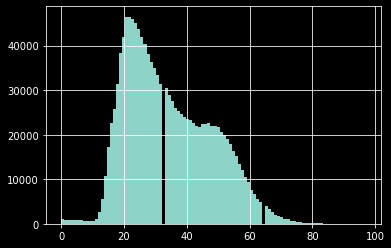

In [7]:
df["Age"].hist(bins=100)

Text(0.5, 1.0, '# of Arrests by Age')

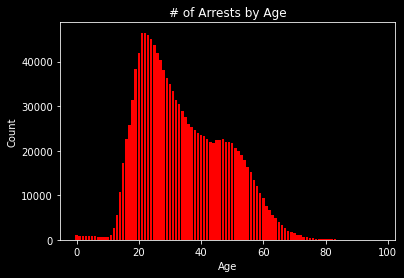

In [8]:
plt.bar(np.sort(df["Age"].unique()), np.asarray(df.groupby(by="Age")["Report ID"].count()), color="r") 
# x, AKA Age, was not sorted at first, so the Age did not match its correct count value.
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("# of Arrests by Age")

Text(0.5, 1.0, '# of Arrests by Age')

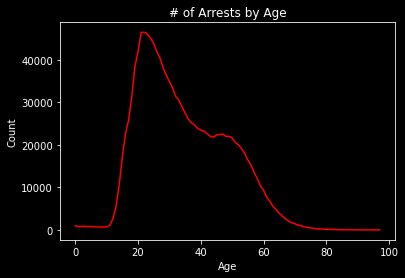

In [9]:
plt.plot(pd.DataFrame(df.groupby(by="Age")["Report ID"].count()), color="r")
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("# of Arrests by Age")

Text(0.5, 1.0, '# of Arrests by Age')

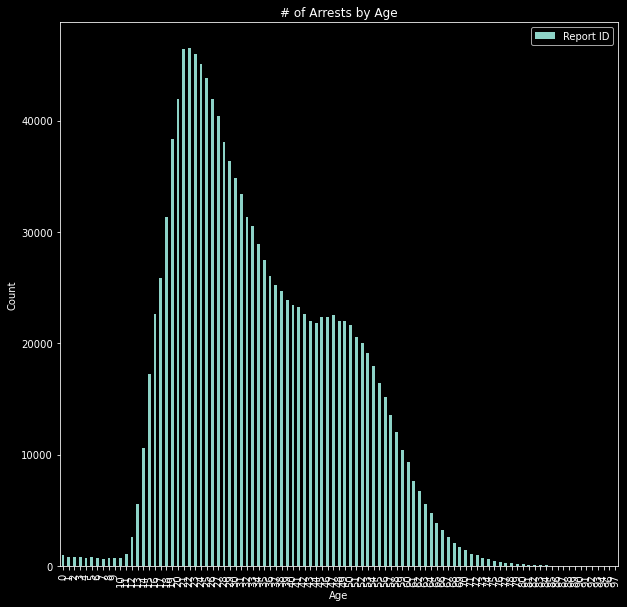

In [10]:
pd.DataFrame(df.groupby(by="Age")["Report ID"].count()).plot(kind="bar", figsize=(10, 10))
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("# of Arrests by Age")

Text(0.5, 1.0, '# of Arrests by Area')

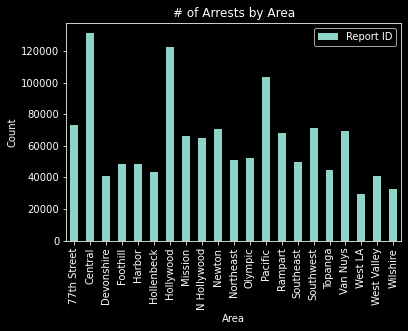

In [11]:
pd.DataFrame(df.groupby(by="Area Name")["Report ID"].count()).plot(kind="bar")
plt.xlabel("Area")
plt.ylabel("Count")
plt.title("# of Arrests by Area")

Text(0.5, 1.0, '# of Arrests by Area')

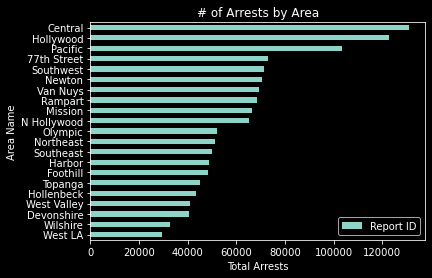

In [12]:
pd.DataFrame(df.groupby(by="Area Name")["Report ID"].count()).sort_values(by="Report ID").plot(kind="barh")
plt.xlabel("Total Arrests")
plt.title("# of Arrests by Area")

In [13]:
# Next Goal: recreate above graph, but with a mean line going through graph, and each bar will show the +-% value indicating
# how much that bar deviates from the mean.

In [14]:
by_area = pd.DataFrame(df.groupby(by="Area Name")["Report ID"].count(), df["Area Name"].unique())
areas_mean = df.groupby(by="Area Name")["Report ID"].count().mean()

In [15]:
# Creating the list directly using the df causes issues: it seems to create 2 pctdiff lists 
# where the 2nd one overrides first. 
# I don't really understand why but the list appears to resemble a df more than a plain list of values.
# Therefore I used the pd core series formula to iterate and create a numeric list, which solved the issue.
pctdiff = []
for area in by_area.index:
    pctdiff.append(round((by_area.loc[area]-areas_mean)/areas_mean*100, 1))

In [16]:
# The pd core series also has to be sorted here so the pctdiff list matches the sorted bar plot below.
pctdiff = []
for a in range(21):
    pctdiff.append(str(round((df.groupby(by="Area Name")["Report ID"].count().sort_values(ascending=False)[a]-areas_mean)/areas_mean*100, 1))+"%")

Text(0.5, 1.0, 'Total Crime by Areas in LA')

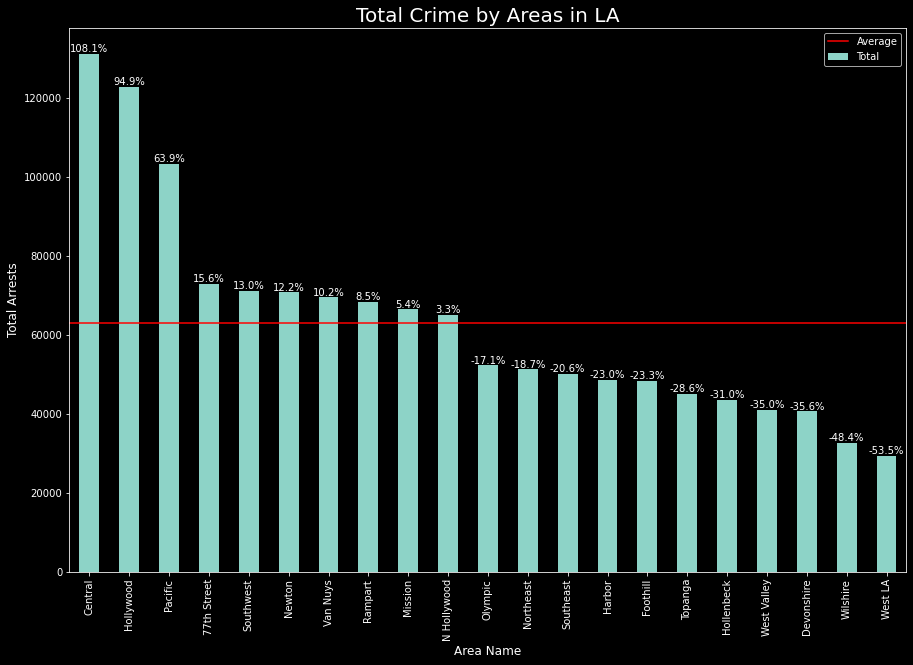

In [17]:
barp = by_area.sort_values(by="Report ID", ascending=False)["Report ID"].plot(kind="bar", label="Total", figsize=(15, 10))
plt.axhline(areas_mean, color="r", label="Average")
plt.bar_label(barp.containers[0], labels=pctdiff, size=10)
plt.legend()
plt.xlabel("Area Name", size=12)
plt.ylabel("Total Arrests", size=12)
plt.title("Total Crime by Areas in LA", size=20)

C:\Users\chiuy\AppData\Local\Temp/ipykernel_14076/2382344702.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=by_area.index, rotation=90, ha="center")


[Text(0, 0, 'Mission'),
 Text(1, 0, 'Wilshire'),
 Text(2, 0, 'Central'),
 Text(3, 0, 'Rampart'),
 Text(4, 0, 'Southwest'),
 Text(5, 0, 'Hollenbeck'),
 Text(6, 0, 'Hollywood'),
 Text(7, 0, 'Topanga'),
 Text(8, 0, '77th Street'),
 Text(9, 0, 'Newton'),
 Text(10, 0, 'Olympic'),
 Text(11, 0, 'Devonshire'),
 Text(12, 0, 'Pacific'),
 Text(13, 0, 'West LA'),
 Text(14, 0, 'Harbor'),
 Text(15, 0, 'Northeast'),
 Text(16, 0, 'Southeast'),
 Text(17, 0, 'Van Nuys'),
 Text(18, 0, 'N Hollywood'),
 Text(19, 0, 'West Valley'),
 Text(20, 0, 'Foothill')]

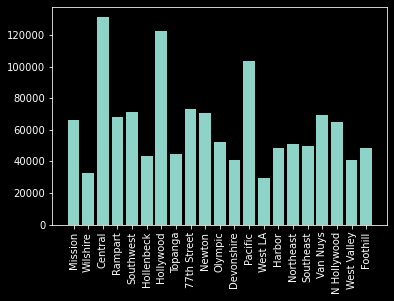

In [18]:
fig, ax = plt.subplots()
ax.bar(by_area.index, by_area["Report ID"])
ax.set_xticklabels(labels=by_area.index, rotation=90, ha="center")

In [19]:
by_date = pd.DataFrame(df.groupby(by="Arrest Date")["Report ID"].count())

In [20]:
to_dt=[]
for i in range(len(by_date.index)):
    to_dt.append(dt.datetime.strptime(by_date.index[i], "%m/%d/%Y").date())

In [21]:
by_date["Date"]= to_dt
by_date.set_index("Date", inplace=True)
by_date.sort_values(by="Date", inplace=True)

In [22]:
df.groupby(by=["Arrest Date", "Area Name", "Sex Code", "Charge Group Description"])["Report ID"].count()

Arrest Date  Area Name    Sex Code  Charge Group Description      
01/01/2010   77th Street  F         Aggravated Assault                1
                                    Other Assaults                    1
                                    Robbery                           2
                          M         Aggravated Assault                3
                                    Driving Under Influence           3
                                                                     ..
12/31/2019   West Valley  M         Moving Traffic Violations         1
             Wilshire     F         Aggravated Assault                1
                                    Larceny                           1
                          M         Aggravated Assault                1
                                    Miscellaneous Other Violations    1
Name: Report ID, Length: 656459, dtype: int64

<AxesSubplot:ylabel='Charge Group Description'>

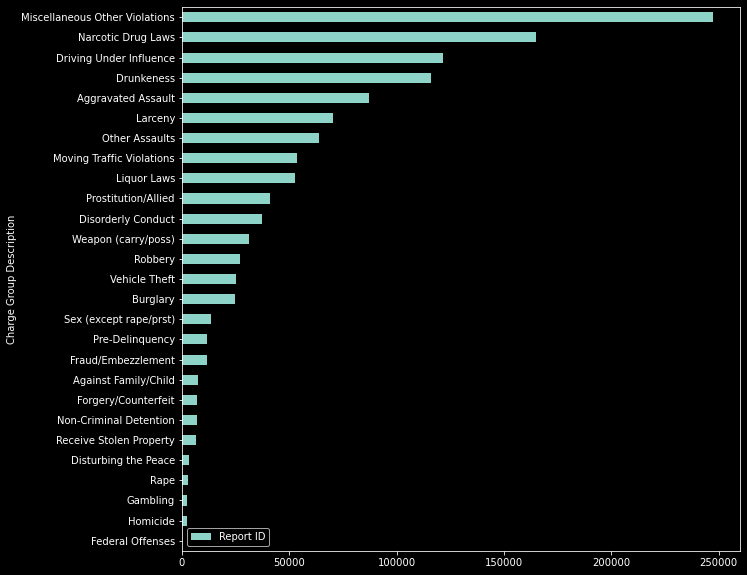

In [23]:
pd.DataFrame(df.groupby(by="Charge Group Description")["Report ID"].count()).sort_values(by="Report ID", ascending=True).plot(kind="barh", figsize=(10, 10))

<AxesSubplot:xlabel='Date'>

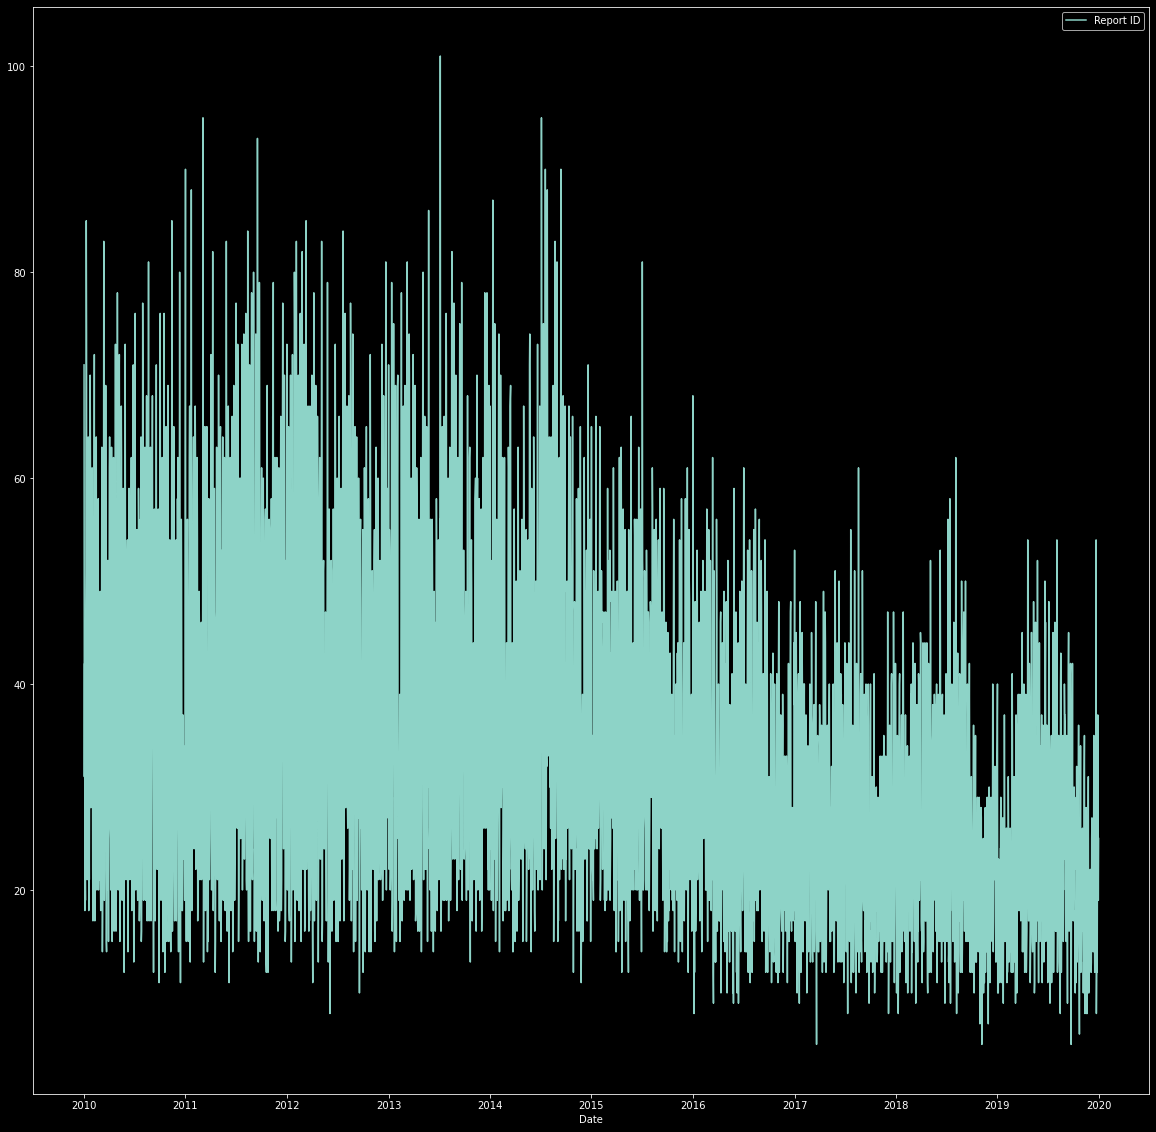

In [24]:
# Plotting the daily change in DUI incidents
DUI_date = pd.DataFrame(df[df["Charge Group Description"]=="Driving Under Influence"].groupby(by="Arrest Date")["Report ID"].count())
DUI_date["Date"] = to_dt
DUI_date.set_index("Date", inplace=True)
DUI_date.sort_values(by="Date", inplace=True)
DUI_date.plot(figsize=(20, 20))

In [25]:
# Build a rolling average calculator function below. Scalable
# A rolling average continuously updates the average of a data set to include all the data in the set until that point.
def cum_run_avg(l):
    run = [0]
    for i in range(1, len(l)):
        run.append(int(l.iloc[:i].mean()))
    return run

C:\Users\chiuy\AppData\Local\Temp/ipykernel_14076/2653408154.py:6: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  run.append(int(l.iloc[:i].mean()))


<AxesSubplot:xlabel='Date'>

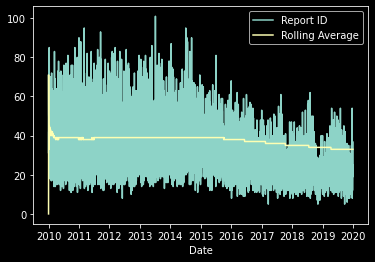

In [26]:
rolling = cum_run_avg(DUI_date)
DUI_date["Rolling Average"] = rolling
DUI_date.iloc[:].plot()

In [27]:
# this piece of code resets the by_date dataframe, removing the new running average columns that have been added.
by_date = pd.DataFrame(df.groupby(by="Arrest Date")["Report ID"].count())
by_date["Date"]= to_dt
by_date.set_index("Date", inplace=True)
by_date.sort_values(by="Date", inplace=True)

C:\Users\chiuy\AppData\Local\Temp/ipykernel_14076/2653408154.py:6: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  run.append(int(l.iloc[:i].mean()))


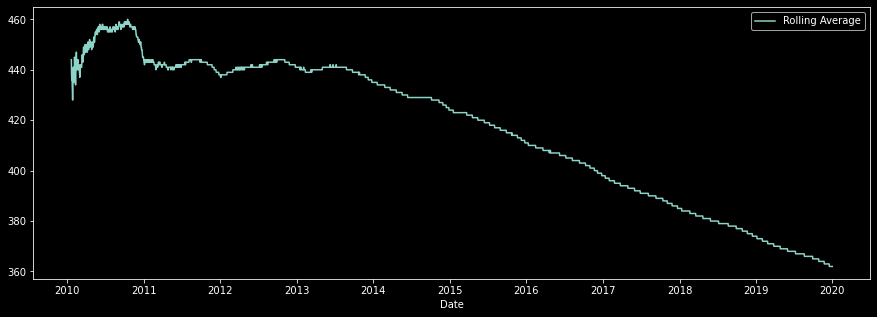

In [28]:
cumu = cum_run_avg(by_date)
by_date["Rolling Average"] = cumu 
by_date.iloc[20:, 1].plot(figsize=(15, 5))
plt.legend()

In [29]:
 # rolling average(n days)
def n_run_avg(l, n):
    n_run = []
    for i in range(n):
        n_run.append(0)
    for i in range(n, len(l)):
        n_run.append(int(l.iloc[i-n:i].mean()))
    return n_run

In [30]:
DUI_date = pd.DataFrame(df[df["Charge Group Description"]=="Driving Under Influence"].groupby(by="Arrest Date")["Report ID"].count())
DUI_date["Date"]= to_dt
DUI_date.set_index("Date", inplace=True)
DUI_date.sort_values(by="Date", inplace=True)

In [31]:
nrunning = n_run_avg(DUI_date, 21)

C:\Users\chiuy\AppData\Local\Temp/ipykernel_14076/1850309398.py:7: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  n_run.append(int(l.iloc[i-n:i].mean()))


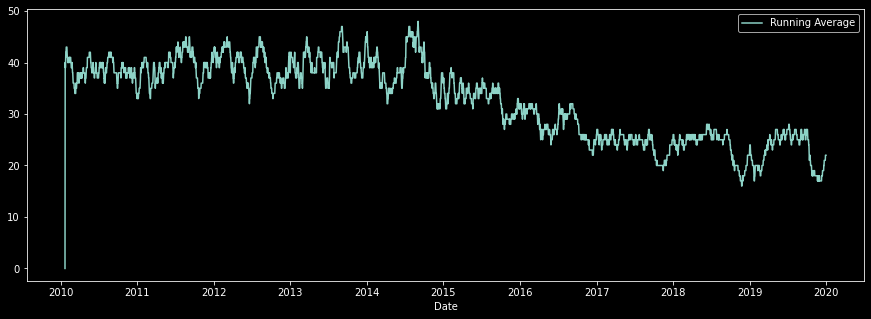

In [32]:
DUI_date["Running Average"] = nrunning
DUI_date.iloc[20:, 1].plot(figsize=(15, 5))
plt.legend()

In [33]:
by_date = pd.DataFrame(df.groupby(by="Arrest Date")["Report ID"].count())
by_date["Date"]= to_dt
by_date.set_index("Date", inplace=True)
by_date.sort_values(by="Date", inplace=True)

In [34]:
nrunning = n_run_avg(by_date, 20)

C:\Users\chiuy\AppData\Local\Temp/ipykernel_14076/1850309398.py:7: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  n_run.append(int(l.iloc[i-n:i].mean()))


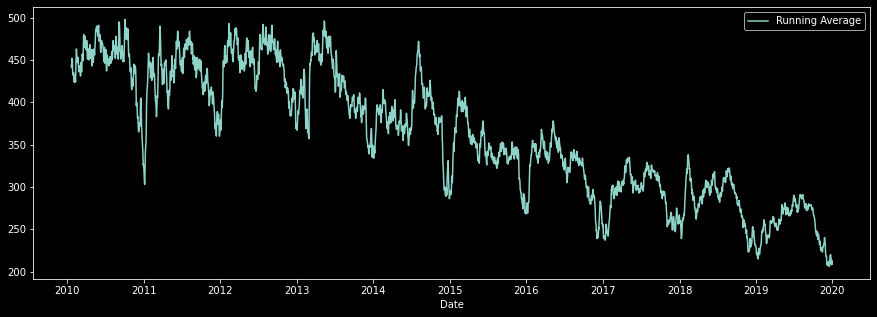

In [35]:
by_date["Running Average"] = nrunning
by_date.iloc[20:, 1].plot(figsize=(15, 5))
plt.legend()

In [36]:
by_date = pd.DataFrame(df.groupby(by="Arrest Date")["Report ID"].count())
by_date["Date"]= to_dt
by_date.set_index("Date", inplace=True)
by_date.sort_values(by="Date", inplace=True)

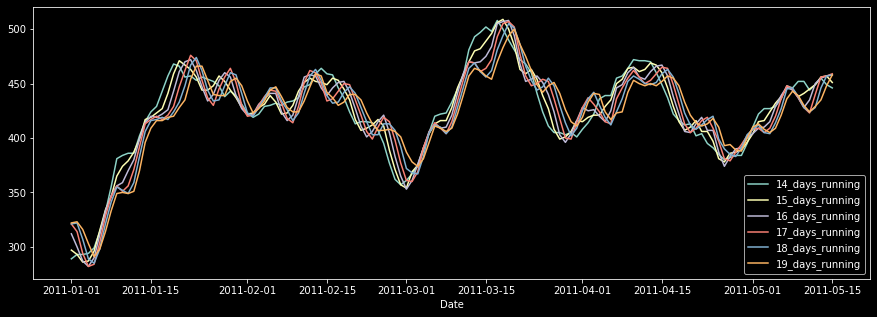

In [37]:
# graphing n-days running average lines using different n to visually comapre the difference in smoothing
for n in range(14, 20):
    nrunning = n_run_avg(by_date["Report ID"], n)
    by_date[str(n) + "_days_running"] = nrunning

by_date.iloc[365:500, 1:19].plot(figsize=(15, 5))
plt.legend()

In [38]:
df["Arrest Date"] = pd.to_datetime(df["Arrest Date"])

In [39]:
df.groupby("Arrest Date")["Report ID"].count()

Arrest Date
2010-01-01    381
2010-01-02    364
2010-01-03    308
2010-01-04    342
2010-01-05    412
             ... 
2019-12-27    242
2019-12-28    221
2019-12-29    209
2019-12-30    204
2019-12-31    185
Name: Report ID, Length: 3652, dtype: int64

In [40]:
by_date = pd.DataFrame(df.groupby(by="Arrest Date")["Report ID"].count())
by_date["Date"]= to_dt
by_date.set_index("Date", inplace=True)
by_date.sort_values(by="Date", inplace=True)

In [41]:
# In hindsight, this technique is very crude. To improve, I would create a new column and isolate the
# year value, and simply perform a groupby process on the dataframe.
annual_mean = pd.DataFrame({"Year": ["2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019"]})
Mean = []
for n in range(2010, 2020):
    Mean.append(float(by_date.loc[pd.date_range(str(n)+"-01-01", str(n)+"-12-31")].mean()))
annual_mean["Mean"] = Mean

C:\Users\chiuy\AppData\Local\Temp/ipykernel_14076/1884471227.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  Mean.append(float(by_date.loc[pd.date_range(str(n)+"-01-01", str(n)+"-12-31")].mean()))


Text(0, 0.5, 'Avg Annual Arrests')

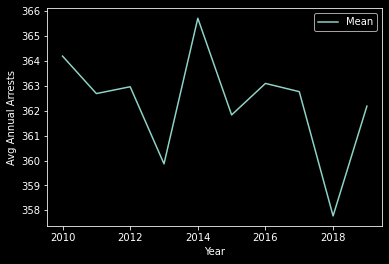

In [42]:
annual_mean.set_index("Year").plot()
plt.ylabel("Avg Annual Arrests")

In [43]:
df.groupby(by=["Area Name", "Charge Group Description"])["Report ID"].count().unstack()

Charge Group Description  Against Family/Child  Aggravated Assault  Burglary  \
Area Name                                                                      
77th Street                                672                7896      2077   
Central                                    171                4885      1140   
Devonshire                                 268                2334       897   
Foothill                                   413                3513      1006   
Harbor                                     426                3996      1141   
Hollenbeck                                 558                3697       768   
Hollywood                                  231                4177      1170   
Mission                                    457                4771      1366   
N Hollywood                                368                3699      1329   
Newton                                     434                5398      1426   
Northeast                                  434                3190      1004   
Olympic                                    246                4645       976   
Pacific                                    258                3258      1284   
Rampart                                    311                5432       974   
Southeast                                  403                5478      1484   
Southwest                                  468                6232      1692   
Topanga                                    300                2963      1090   
Van Nuys                                   413                4357      1223   
West LA                                    132                1565       675   
West Valley                                292                2781       903   
Wilshire                                   211                2706       861   

Charge Group Description  Disorderly Conduct  Disturbing the Peace  \
Area Name                                                            
77th Street                              228                    60   
Central                                19825                   209   
Devonshire                               288                   302   
Foothill                                 148                   218   
Harbor                                   759                   130   
Hollenbeck                               135                    93   
Hollywood                               5715                   229   
Mission                                  713                   359   
N Hollywood                              688                   189   
Newton                                  2059                   155   
Northeast                                336                   136   
Olympic                                  183                    71   
Pacific                                 2545                   170   
Rampart                                  520                   121   
Southeast                                605                    29   
Southwest                                710                    78   
Topanga                                  235                   181   
Van Nuys                                 373                   159   
West LA                                  946                    93   
West Valley                              176                   116   
Wilshire                                 207                    52   

Charge Group Description  Driving Under Influence  Drunkeness  \
Area Name                                                       
77th Street                                  7036        1956   
Central                                      5184       11091   
Devonshire                                   4376        2615   
Foothill                                     6326        2679   
Harbor                                       2989        4177   
Hollenbeck                                   3824        4972   
Hollywood                   

In [44]:
area_pop = pd.DataFrame({"Area":df["Area Name"].unique()})
area_pop.set_index("Area", inplace=True)
area_pop["Population"] = ""
area_pop["SqMile"] = ""

In [45]:
# MARRYING A NEW DATASET TO THIS PROJECT
# the data below are gathered from https://www.lapdonline.org/find-your-local-police-station/
# each division lists its approx. population and land size in sq miles. Some division did not list such information,
# but their population can be calcualted by subtracting the population from other divisions in the same bureau
# info on Olympic found at https://www.city-facts.com/olympic-park-los-angeles
area_pop.loc["77th Street", "Population"] = 175000
area_pop.loc["77th Street", "SqMile"] = 11.9
area_pop.loc["Central", "Population"] = 40000
area_pop.loc["Central", "SqMile"] = 4.5
area_pop.loc["Devonshire", "Population"] = 219136
area_pop.loc["Devonshire", "SqMile"] = 48.31
area_pop.loc["Foothill", "Population"] = 182214
area_pop.loc["Foothill", "SqMile"] = 46.13
area_pop.loc["Harbor", "Population"] = 171000
area_pop.loc["Harbor", "SqMile"] = 27
area_pop.loc["Hollenbeck", "Population"] = 200000
area_pop.loc["Hollenbeck", "SqMile"] = 15.2
area_pop.loc["Hollywood", "Population"] = 300000
area_pop.loc["Hollywood", "SqMile"] = 17.2
area_pop.loc["Mission", "Population"] = 225849
area_pop.loc["Mission", "SqMile"] = 25.1
area_pop.loc["N Hollywood", "Population"] = 220000
area_pop.loc["N Hollywood", "SqMile"] = 25
area_pop.loc["Newton", "Population"] = 187739
area_pop.loc["Newton", "SqMile"] = 11.25
area_pop.loc["Northeast", "Population"] = 250000
area_pop.loc["Northeast", "SqMile"] = 29
area_pop.loc["Olympic", "Population"] = 17558
area_pop.loc["Olympic", "SqMile"] = 7
area_pop.loc["Pacific", "Population"] = 200000
area_pop.loc["Pacific", "SqMile"] = 25.74
area_pop.loc["Rampart", "Population"] = 164961
area_pop.loc["Rampart", "SqMile"] = 5.54
area_pop.loc["Southeast", "Population"] = 150000
area_pop.loc["Southeast", "SqMile"] = 10.2
area_pop.loc["Southwest", "Population"] = 165000
area_pop.loc["Southwest", "SqMile"] = 13.11
area_pop.loc["Topanga", "Population"] = 430961
area_pop.loc["Topanga", "SqMile"] = 18.37
area_pop.loc["Van Nuys", "Population"] = 325000
area_pop.loc["Van Nuys", "SqMile"] = 30
area_pop.loc["West LA", "Population"] = 228000
area_pop.loc["West LA", "SqMile"] = 65.14
area_pop.loc["West Valley", "Population"] = 196840
area_pop.loc["West Valley", "SqMile"] = 33.5
area_pop.loc["Wilshire", "Population"] = 251000
area_pop.loc["Wilshire", "SqMile"] = 13.97

In [46]:
area_total = pd.concat([by_area, area_pop], axis=1)

In [47]:
area_total["crime/pop"] = area_total["Report ID"]/area_total["Population"]
area_total["crime/sqmi"] = area_total["Report ID"]/area_total["SqMile"]

In [48]:
area_total

Report ID Population SqMile crime/pop    crime/sqmi
Mission          66415     225849   25.1  0.294068   2646.015936
Wilshire         32530     251000  13.97  0.129602   2328.561203
Central         131096      40000    4.5    3.2774  29132.444444
Rampart          68337     164961   5.54  0.414262  12335.198556
Southwest        71167     165000  13.11  0.431315   5428.451564
Hollenbeck       43457     200000   15.2  0.217285   2859.013158
Hollywood       122773     300000   17.2  0.409243   7137.965116
Topanga          44956     430961  18.37  0.104316   2447.250953
77th Street      72861     175000   11.9  0.416349   6122.773109
Newton           70671     187739  11.25  0.376432   6281.866667
Olympic          52218      17558      7  2.974029   7459.714286
Devonshire       40575     219136  48.31  0.185159    839.888222
Pacific         103274     200000  25.74   0.51637   4012.198912
West LA          29299     228000  65.14  0.128504    449.785078
Harbor           48541     171000     27  0.283865   1797.814815
Northeast        51197     250000     29  0.204788   1765.413793
Southeast        50022     150000   10.2   0.33348   4904.117647
Van Nuys         69409     325000     30  0.213566   2313.633333
N Hollywood      65061     220000     25  0.295732       2602.44
West Valley      40962     196840   33.5  0.208098   1222.746269
Foothill         48325     182214  46.13   0.26521   1047.582918

In [49]:
crime_per_10000 = area_total.copy()
crime_per_10000["per10000"] = crime_per_10000["Report ID"]/crime_per_10000["Population"]*10000
crime_per_10000.drop(["Report ID", "Population", "SqMile", "crime/pop", "crime/sqmi"], axis=1, inplace=True)
crime_per_10000.sort_values(by="per10000", ascending=True, inplace=True)

<BarContainer object of 21 artists>

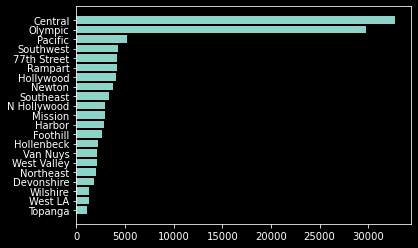

In [50]:
plt.barh(crime_per_10000.index, crime_per_10000["per10000"])

Text(0.5, 1.0, 'Arrests per 10000 by Areas in LA')

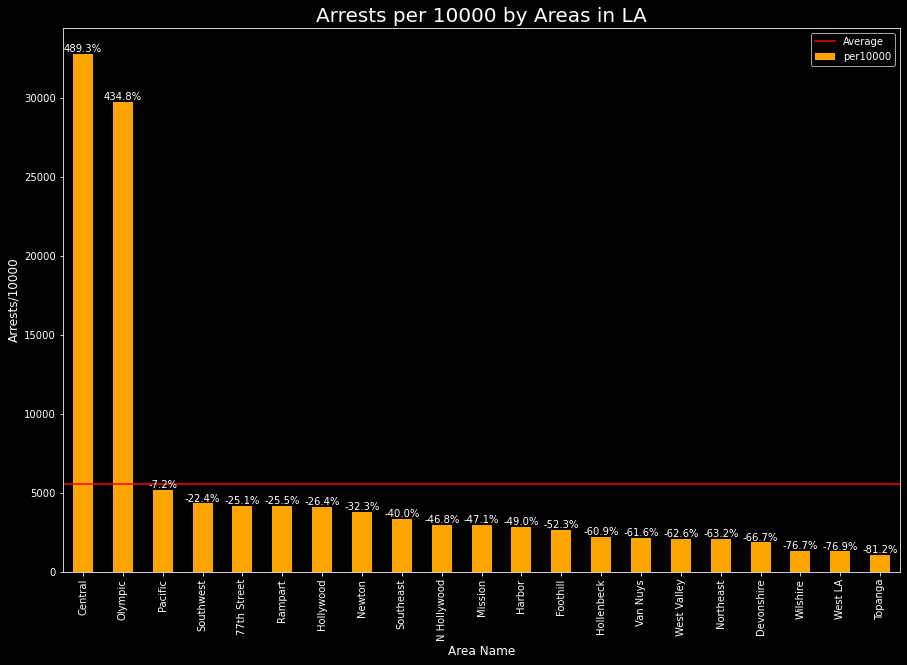

In [51]:
barp = crime_per_10000.sort_values(by="per10000", ascending=False).plot(kind="bar", label="Total", color="orange", figsize=(15, 10))
areas_mean = crime_per_10000["per10000"].mean()
plt.axhline(areas_mean, color="r", label="Average")
pctdiff = []
for a in range(21):
    pctdiff.append(str(round(float(crime_per_10000["per10000"].sort_values(ascending=False)[a]-areas_mean)/areas_mean*100, 1))+"%")
plt.bar_label(barp.containers[0], labels=pctdiff, size=10)
plt.legend()
plt.xlabel("Area Name", size=12)
plt.ylabel("Arrests/10000", size=12)
plt.title("Arrests per 10000 by Areas in LA", size=20)

In [52]:
pctdiff = []
for area in by_area.index:
    pctdiff.append(round((by_area.loc[area]-areas_mean)/areas_mean*100, 1))

In [53]:
barp.containers[0]

<BarContainer object of 21 artists>

In [54]:
by_area

Report ID
Mission          66415
Wilshire         32530
Central         131096
Rampart          68337
Southwest        71167
Hollenbeck       43457
Hollywood       122773
Topanga          44956
77th Street      72861
Newton           70671
Olympic          52218
Devonshire       40575
Pacific         103274
West LA          29299
Harbor           48541
Northeast        51197
Southeast        50022
Van Nuys         69409
N Hollywood      65061
West Valley      40962
Foothill         48325

Text(0.5, 1.0, 'Total Crime by Areas in LA')

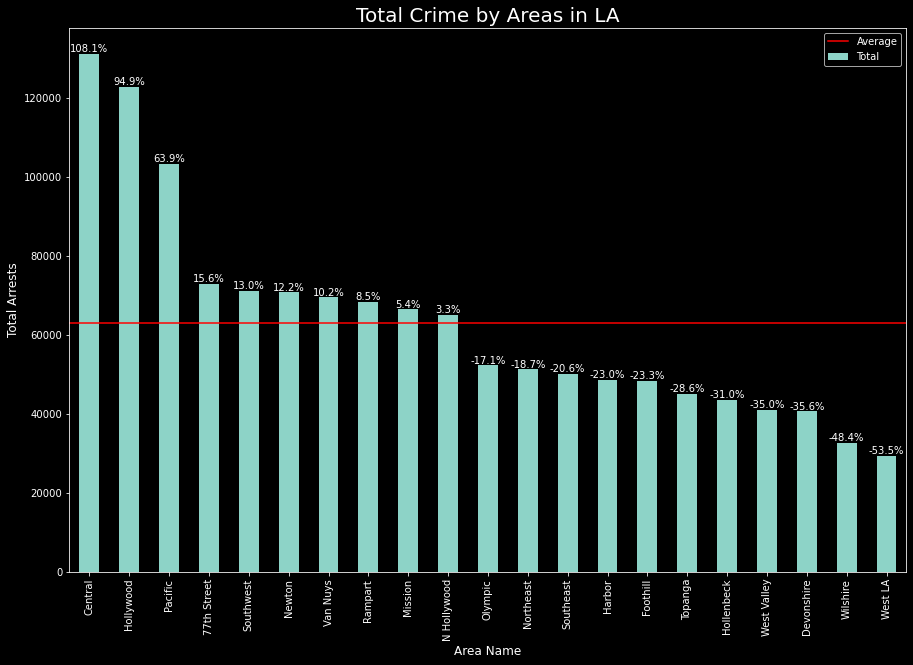

In [55]:
barp = by_area.sort_values(by="Report ID", ascending=False)["Report ID"].plot(kind="bar", label="Total", figsize=(15, 10))
areas_mean = df.groupby(by="Area Name")["Report ID"].count().mean()
plt.axhline(areas_mean, color="r", label="Average")
pctdiff = []
for a in range(21):
    pctdiff.append(str(round((df.groupby(by="Area Name")["Report ID"].count().sort_values(ascending=False)[a]-areas_mean)/areas_mean*100, 1))+"%")
plt.bar_label(barp.containers[0], labels=pctdiff, size=10)
plt.legend()
plt.xlabel("Area Name", size=12)
plt.ylabel("Total Arrests", size=12)
plt.title("Total Crime by Areas in LA", size=20)

In [56]:
iso_2018 = df.set_index("Arrest Date").loc[pd.date_range("2018-01-01", "2018-12-31")]
by_area_2018 = iso_2018.groupby(by="Area Name")["Report ID"].count()
area_total_2018 = pd.concat([by_area_2018, area_pop], axis=1)
area_total_2018["crime/pop"] = area_total_2018["Report ID"]/area_total_2018["Population"]
area_total_2018["crime/sqmi"] = area_total_2018["Report ID"]/area_total_2018["SqMile"]
area_total_2018

Report ID Population SqMile crime/pop   crime/sqmi
77th Street       6225     175000   11.9  0.035571   523.109244
Central          10923      40000    4.5  0.273075  2427.333333
Devonshire        3128     219136  48.31  0.014274    64.748499
Foothill          2978     182214  46.13  0.016343    64.556688
Harbor            3858     171000     27  0.022561   142.888889
Hollenbeck        3555     200000   15.2  0.017775   233.881579
Hollywood         9682     300000   17.2  0.032273   562.906977
Mission           4336     225849   25.1  0.019199   172.749004
N Hollywood       4924     220000     25  0.022382       196.96
Newton            5397     187739  11.25  0.028747   479.733333
Northeast         3436     250000     29  0.013744   118.482759
Olympic           3878      17558      7  0.220868        554.0
Pacific           6770     200000  25.74   0.03385   263.014763
Rampart           7309     164961   5.54  0.044307  1319.314079
Southeast         3576     150000   10.2   0.02384   350.588235
Southwest         5881     165000  13.11  0.035642   448.588863
Topanga           3061     430961  18.37  0.007103   166.630376
Van Nuys          6012     325000     30  0.018498        200.4
West LA           2674     228000  65.14  0.011728    41.050046
West Valley       3541     196840   33.5  0.017989   105.701493
Wilshire          2448     251000  13.97  0.009753   175.232641

In [57]:
crime_per_10000_2018 = area_total_2018.copy()
crime_per_10000_2018["per10000"] = area_total_2018["crime/pop"]*10000
crime_per_10000_2018.drop(["Report ID", "Population", "SqMile", "crime/pop", "crime/sqmi"], axis=1, inplace=True)
crime_per_10000_2018.sort_values(by="per10000", ascending=True, inplace=True)

Text(0.5, 1.0, 'Arrests per 10000 by Areas in LA 2018')

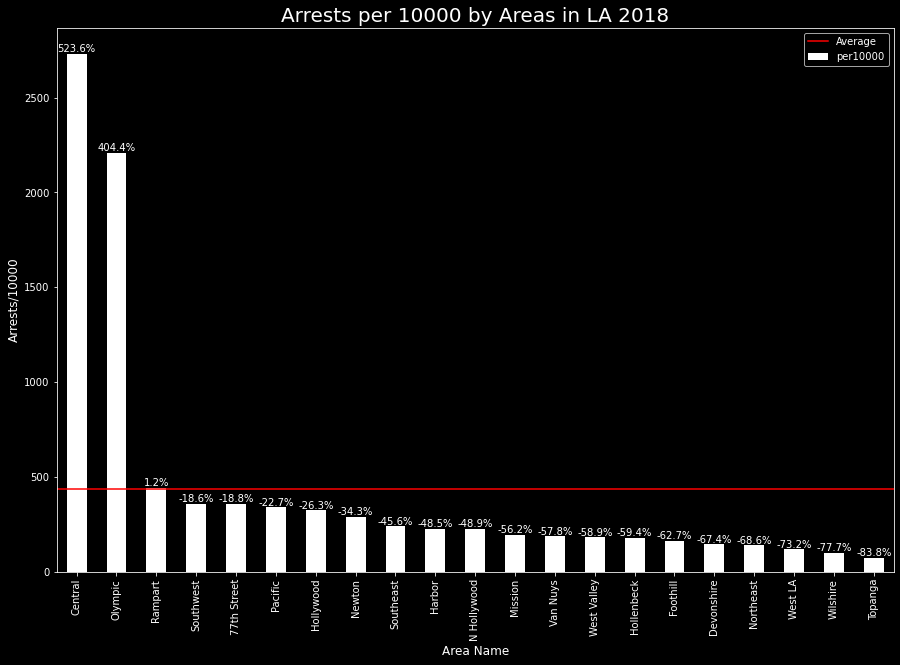

In [58]:
barp = crime_per_10000_2018.sort_values(by="per10000", ascending=False).plot(kind="bar", label="Total", color="white", figsize=(15, 10))
areas_mean_2018 = crime_per_10000_2018["per10000"].mean()
plt.axhline(areas_mean_2018, color="r", label="Average")
pctdiff = []
for a in range(21):
    pctdiff.append(str(round(float(crime_per_10000_2018["per10000"].sort_values(ascending=False)[a]-areas_mean_2018)/areas_mean_2018*100, 1))+"%")
plt.bar_label(barp.containers[0], labels=pctdiff, size=10)
plt.legend()
plt.xlabel("Area Name", size=12)
plt.ylabel("Arrests/10000", size=12)
plt.title("Arrests per 10000 by Areas in LA 2018", size=20)

Text(0.5, 1.0, 'Arrests per sqmile by Areas in LA 2018')

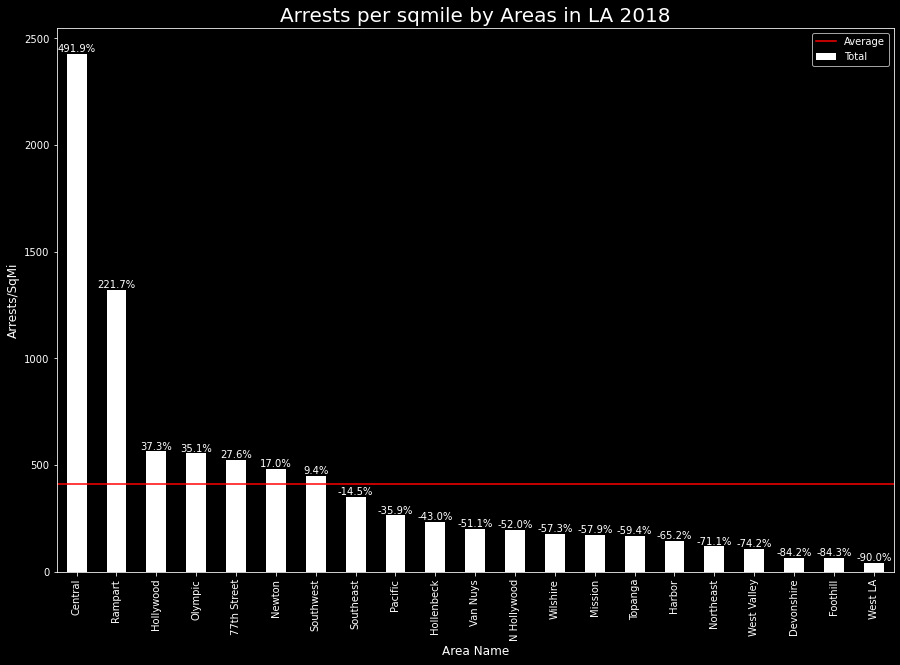

In [59]:
barp = area_total_2018.sort_values(by="crime/sqmi", ascending=False)["crime/sqmi"].plot(kind="bar", label="Total", color="white", figsize=(15, 10))
mean = area_total_2018["crime/sqmi"].mean()
plt.axhline(mean, color="r", label="Average")
pctdiff = []
for a in range(21):
    pctdiff.append(str(round(float(area_total_2018["crime/sqmi"].sort_values(ascending=False)[a]-mean)/mean*100, 1))+"%")
plt.bar_label(barp.containers[0], labels=pctdiff, size=10)
plt.legend()
plt.xlabel("Area Name", size=12)
plt.ylabel("Arrests/SqMi", size=12)
plt.title("Arrests per sqmile by Areas in LA 2018", size=20)

<AxesSubplot:xlabel='Arrest Date'>

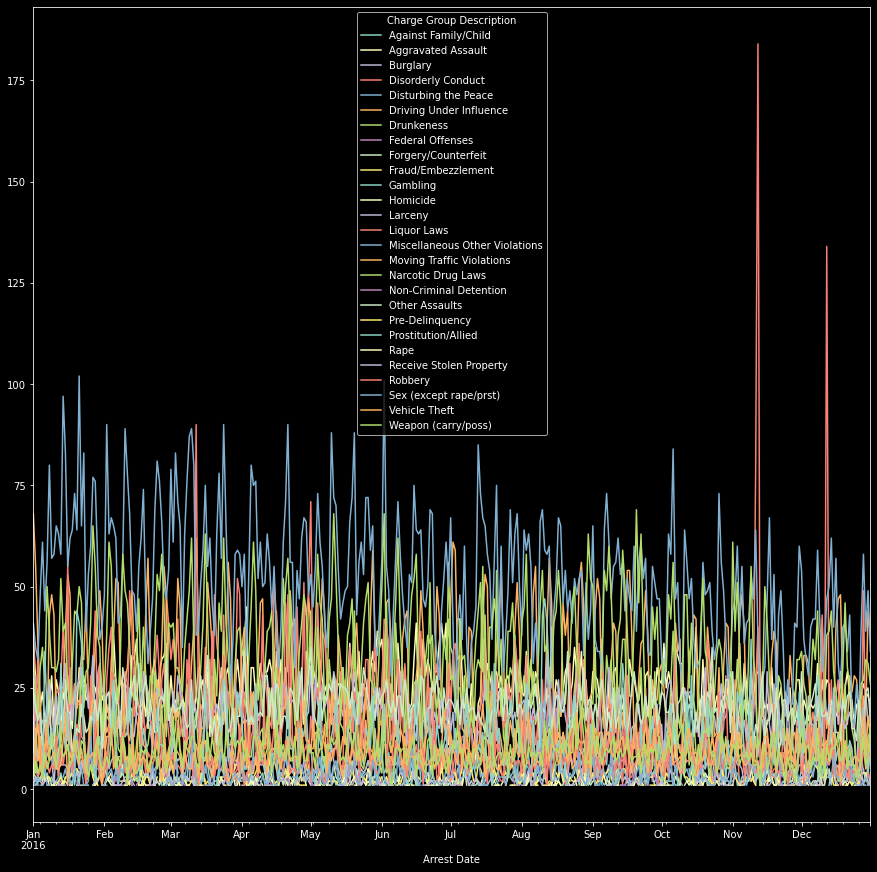

In [60]:
# Wanted to look at change in crime for all categories within a single year. This is a great example
# of a terrible graph - way too much information to be useful.
iso_2016 = df.set_index("Arrest Date").loc[pd.date_range("2016-01-01", "2016-12-31")]
iso_2016 = iso_2016.reset_index().rename(columns={"index": "Arrest Date"})
iso_2016.groupby(["Charge Group Description", "Arrest Date"])["Report ID"].count().unstack().T.plot(figsize=(15, 15))

<AxesSubplot:ylabel='Charge Group Description'>

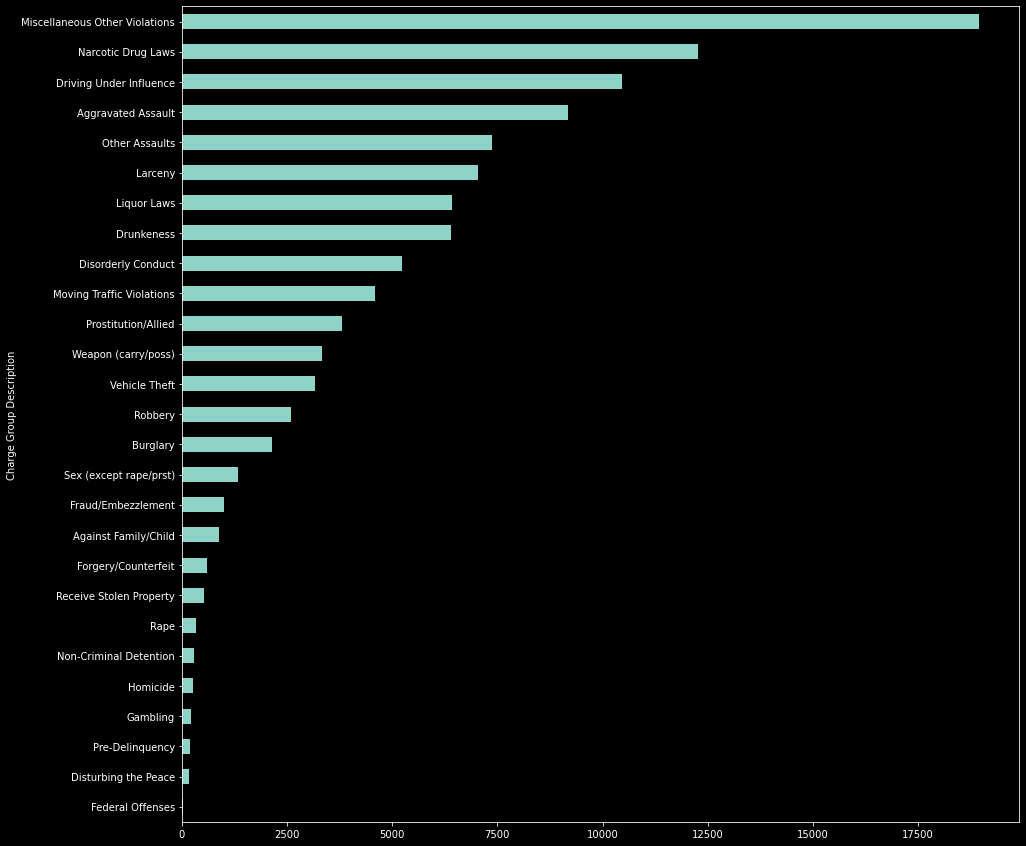

In [61]:
iso_2016.groupby("Charge Group Description")["Report ID"].count().sort_values().plot(kind="barh", figsize=(15, 15))

In [62]:
# Here I realized that "Miscellaneous Other Violations" as a single group is not very useful information
# because it includes a wide variety of criminal activities differing in nature and severity. 
iso_2016[iso_2016["Charge Group Description"]=="Miscellaneous Other Violations"]["Charge Description"].unique()

array(['ILLEGAL POSSESSION OF SHOPPING CART',
       'ILLEGAL STREET/SIDEWALK SALES',
       'URINATING OR DEFECATING IN PUBLIC',
       'ILLEGAL POSSESSION OF SHOPPING CART****', 'ARSON OF PROPERTY',
       'PAROLE WARRANT', 'CONTEMPT OF COURT - GANG ACT INJUNCTION',
       'DEFACE/DAMAGE PROPERTY <$400',
       'DISOBEY DOMESTIC RELATIONS CRT ORDER W/PR',
       'FTA AFTER WRITTEN PROMISE', 'FLASH INCARCERATION', 'VANDALISM',
       'CONTEMPT OF COURT - DISOBEY COURT ORDER',
       'PETITION TO REVOKE PRCS', 'POSSESSION BURGLARY TOOLS',
       'CURFEW - JUV ONLY', 'TRESPASS ON PVT PROP W/SIGN POSTED',
       'REFUSE TO LEAVE PROPERTY UPON REQUEST P.O.',
       'VIOLATION OF PAROLE:FELONY',
       'FUGITIVE FROM JUSTICE:WARRANTLESS ARREST',
       'REFUSE TO LEAVE LANDS UPON REQUEST', 'LOS ANGELES MUNICIPAL CODE',
       'VIOL DOMESTIC VIOL PROTECT/STAY AWAY ORD', 'VIOLATION OF PAROLE',
       'PROBATION VIOLATION', 'CONSPIRACY TO COMMIT ANY CRIME',
       'HIRE VEH W/O LIC', 'ENTER/R

In [63]:
#!pip install wordcloud
from wordcloud import WordCloud as wc

In [64]:
# Here I'm 
f = iso_2016[iso_2016["Charge Group Description"]=="Miscellaneous Other Violations"]["Charge Description"].value_counts()
print(f)
print("-------------------------------------------------")
print(f[f > 1])
print("-------------------------------------------------")
print(f[f>25])

Charge Description
FTA AFTER WRITTEN PROMISE                   2935
FLASH INCARCERATION                         1253
PAROLE WARRANT                              1210
VANDALISM                                    846
ILLEGAL POSSESSION OF SHOPPING CART          771
                                            ... 
REAREST: ELEC MONITOR PROB                     1
FAILURE TO REGISTER AS AN ARSON OFFENDER       1
TRESPASS ON HOUSING AUTHORITY PROPE            1
PASS HIRE/NO PERM                              1
ARREST/DETAIN W/O AUTHORITY                    1
Name: count, Length: 293, dtype: int64
-------------------------------------------------
Charge Description
FTA AFTER WRITTEN PROMISE                 2935
FLASH INCARCERATION                       1253
PAROLE WARRANT                            1210
VANDALISM                                  846
ILLEGAL POSSESSION OF SHOPPING CART        771
                                          ... 
MINOR PURCHASE SPRAY PAINT                   2
OPER 

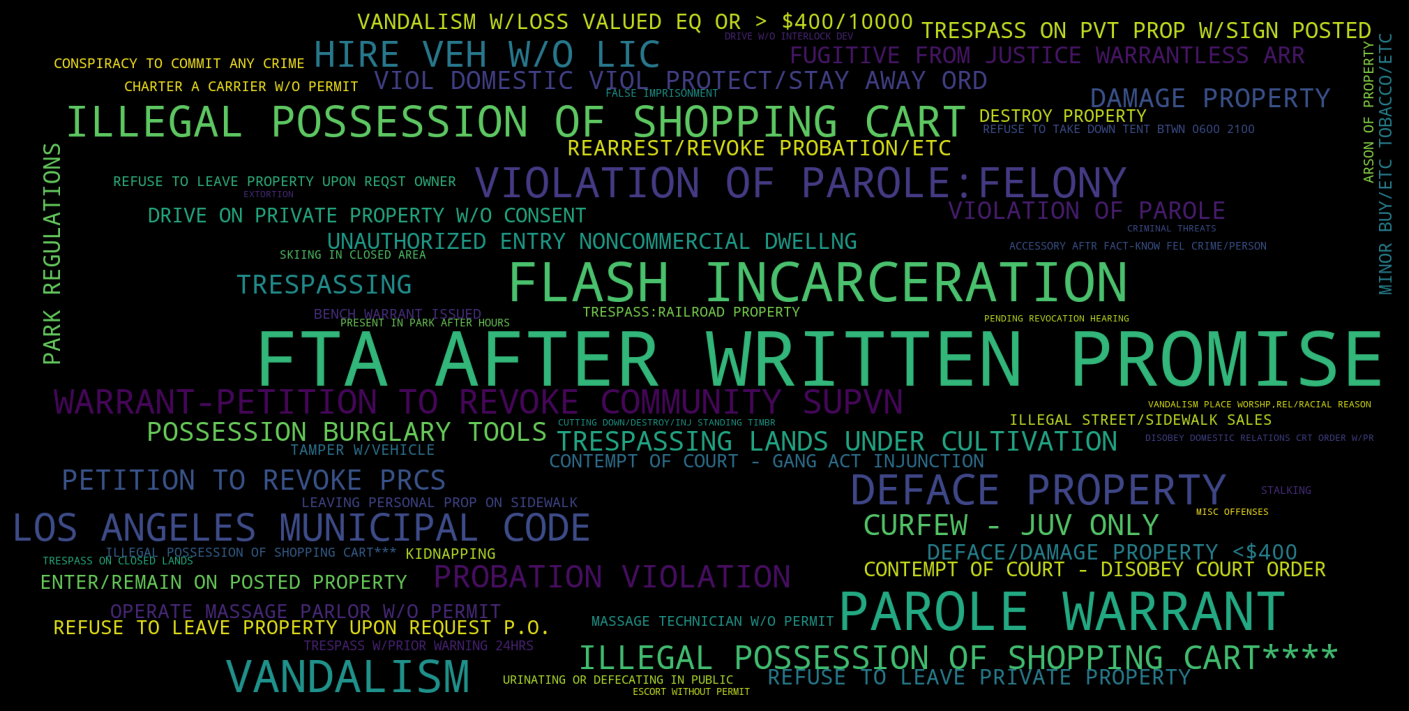

In [65]:
f = iso_2016[iso_2016["Charge Group Description"]=="Miscellaneous Other Violations"]["Charge Description"].value_counts()
wordcloud = wc(width = 2000, height = 1000).generate_from_frequencies(f[f > 25])
plt.figure(figsize=(25, 25))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [66]:
df["Booking Location"]

0                            NaN
1                            NaN
2                            NaN
3                            NaN
4                            NaN
                   ...          
1323141    METRO - JAIL DIVISION
1323142                  PACIFIC
1323143        VALLEY - JAIL DIV
1323144                  PACIFIC
1323145        VALLEY - JAIL DIV
Name: Booking Location, Length: 1323146, dtype: object

In [114]:
(a.year for a in df["Arrest Date"])

[<generator object <genexpr> at 0x000001E50F135CF0>]


In [69]:
# Removing unneeded or duplicate data.
# Addresses are not needed since they are not always accurate and the coordinates are already given.
df_concise = df.drop(df[["Report Type", "Area ID", "Reporting District", "Descent Code", "Charge Group Code",
                        "Arrest Type Code", "Charge", "Disposition Description", "Cross Street", "Location", "Booking Date",
                        "Booking Location", "Booking Time", "Booking Location Code"]], axis=1)

In [70]:
df_concise.rename(columns={"Sex Code": "Sex"}, inplace=True)

In [71]:
df_concise["Charge Group Description"].fillna("Unknown", inplace=True)
df_concise["Charge Description"].fillna("UNKNOWN", inplace=True)
df_concise.dropna(how="any", axis=0, inplace=True)
# When applying the round_to_15() function I kept getting an error at row 3785, which was where
# the first null value was removed. It turns out that I needed to reset the index because after
# removing the row there was a gap in the index and the for loop could not execult properly.
df_concise.reset_index(drop=True, inplace=True)

In [72]:
df_concise["Year"] = list(y.year for y in df_concise["Arrest Date"])
df_concise["Month"] = list(y.month for y in df_concise["Arrest Date"])
df_concise["Day"] = list(y.day for y in df_concise["Arrest Date"])

In [73]:
# This function rounds the time to the nearest 15 minutes. Input "time" must be an integer between 0
# and 2400. E.g. 1115, 2107
def round_to_15(time):
    if math.isnan(time) == True:
        return(time)
    elif time > 100:
        hour = float(str(int(time))[:-2])*100
    else:
        hour = 0
    minutes = float(str(int(time))[-2:])
    rounded = round(minutes/15)*15
    if rounded == 60:
        rounded = 0
        hour += 100
    final = hour + rounded
    return(final)

In [74]:
# This takes forever (took 3 hours 53 minutes to fully run)

# for i in range(len(df_concise)):
#     df_concise.loc[i, "Time"] = round_to_15(df_concise.loc[i, "Time"])

In [75]:
# This method is way too slow. Use method in cell below.

# df_concise["Weekday"] = ""
# for i in range(len(df_concise)):
#     df_concise.loc[i, "Weekday"] = df_concise.loc[i, "Arrest Date"].weekday()

In [76]:
time = df_concise["Time"]
rounded = list(round_to_15(a) for a in time)
df_concise["Time"] = rounded

In [77]:
# Instead of iterating through the whole df and applying .weekday(), this method
# turns the "Arrest Date" column into a list, applies the .weekday() using a generator, and turns
# the object back into a list. 
date = list(df_concise["Arrest Date"])
weekday = list(a.weekday() + 1 for a in date) # .weekday() returns 0 (Monday) to 6 (Sunday). 
                                              # I want to represent Monday as 1 and Sunday as 7.
df_concise["Weekday"] = weekday

([<matplotlib.axis.XTick at 0x1e4a5723340>,
 [Text(0, 0, 'Monday'),
  Text(1, 0, 'Tuesday'),
  Text(2, 0, 'Wednesday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Friday'),
  Text(5, 0, 'Saturday'),
  Text(6, 0, 'Sunday')])

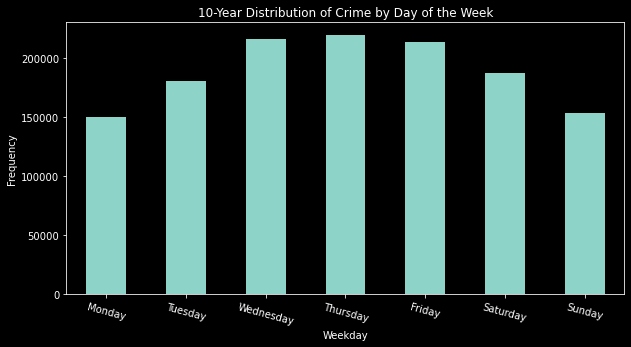

In [78]:
df_concise.groupby(by="Weekday")["Age"].count().plot(kind="bar", figsize=(10, 5))
plt.title("10-Year Distribution of Crime by Day of the Week")
plt.xlabel("Weekday")
plt.ylabel("Frequency")
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=["Monday", "Tuesday", "Wednesday", "Thursday", 
                                                "Friday", "Saturday", "Sunday"]
          , rotation=345)

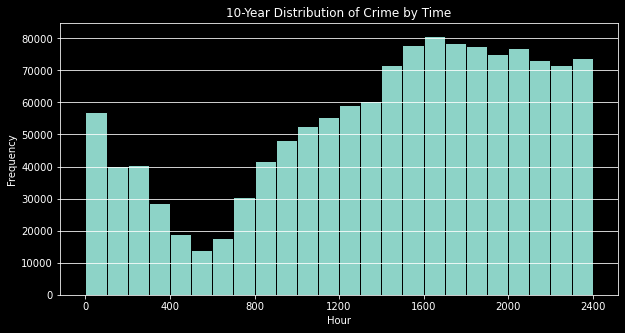

In [79]:
df_concise["Time"].hist(bins=24, figsize=(10, 5), edgecolor="black")
plt.title("10-Year Distribution of Crime by Time")
plt.xlabel("Hour")
plt.ylabel("Frequency")
plt.xticks([0, 400, 800, 1200, 1600, 2000, 2400])
plt.grid(False, axis="x")

In [80]:
df_concise

Report ID Arrest Date    Time    Area Name  Age Sex  \
0        121920046  2012-09-28   930.0      Mission   60   M   
1         90712341  2011-03-10   945.0     Wilshire   45   M   
2        121909585  2012-04-01  1715.0      Mission   37   M   
3        100109543  2010-04-14  1515.0      Central   38   F   
4        100208368  2010-03-18  2115.0      Rampart   40   F   
...            ...         ...     ...          ...  ...  ..   
1322945    5605475  2019-04-19  1615.0   Hollenbeck   19   M   
1322946    5654016  2019-06-09  1930.0      Pacific   24   M   
1322947    5758490  2019-09-27   815.0  N Hollywood   36   M   
1322948    5789045  2019-11-02  1330.0      Pacific   21   M   
1322949    5656555  2019-06-12   900.0     Foothill   53   M   

               Charge Group Description  \
0                               Unknown   
1                            Drunkeness   
2                               Unknown   
3                   Prostitution/Allied   
4        Miscellaneous Other Violations   
...                                 ...   
1322945              Narcotic Drug Laws   
1322946              Narcotic Drug Laws   
1322947              Narcotic Drug Laws   
1322948              Narcotic Drug Laws   
1322949              Aggravated Assault   

                                Charge Description  \
0                                          UNKNOWN   
1                               DRINKING IN PUBLIC   
2                                          UNKNOWN   
3                       LOITER:INTENT:PROSTITUTION   
4                            ESCORT WITHOUT PERMIT   
...                                            ...   
1322945  POSSESS LESS THAN 28.5 GRAMS OF MARIJUANA   
1322946  POSSESS LESS THAN 28.5 GRAMS OF MARIJUANA   
1322947  POSSESS LESS THAN 28.5 GRAMS OF MARIJUANA   
1322948  POSSESS LESS THAN 28.5 GRAMS OF MARIJUANA   
1322949  INJURING A SPOUSE/COHABITANT, ETC W/PRIOR   

                                         Address      LAT       LON  Year  \
0        7600    WOODMAN                      AV  34.2111 -118.4309  2012   
1        4500 W  WASHINGTON                   BL  34.0399 -118.3375  2011   
2        8100    SEPULVEDA                    PL  34.2208 -118.4662  2012   
3                                            7TH  34.0395 -118.2405  2010   
4        1900 W  OLYMPIC                      BL  34.0508 -118.2777  2010   
...                                          ...      ...       ...   ...   
1322945                             CESAR CHAVEZ  34.0468 -118.2078  2019   
1322946   200    WORLD                        WY  33.9449 -118.4059  2019   
1322947  6000    LANKERSHIM                   BL  34.1794 -118.3834  2019   
1322948   500    WORLD                        WY  33.9428 -118.4054  2019   
1322949          VAN NUYS                     BL  34.2588 -118.4321  2019   

         Month  Day  Weekday  
0            9   28        5  
1            3   10        4  
2            4    1        7  
3            4   14        3  
4            3   18        4  
...        ...  ...      ...  
1322945      4   19        5  
1322946      6    9        7  
1322947      9   27        5  
1322948     11    2        6  
1322949      6   12        3  

[1322950 rows x 15 columns]

Text(0.5, 1.0, 'Annual Crime Trend in LA 2010-2019')

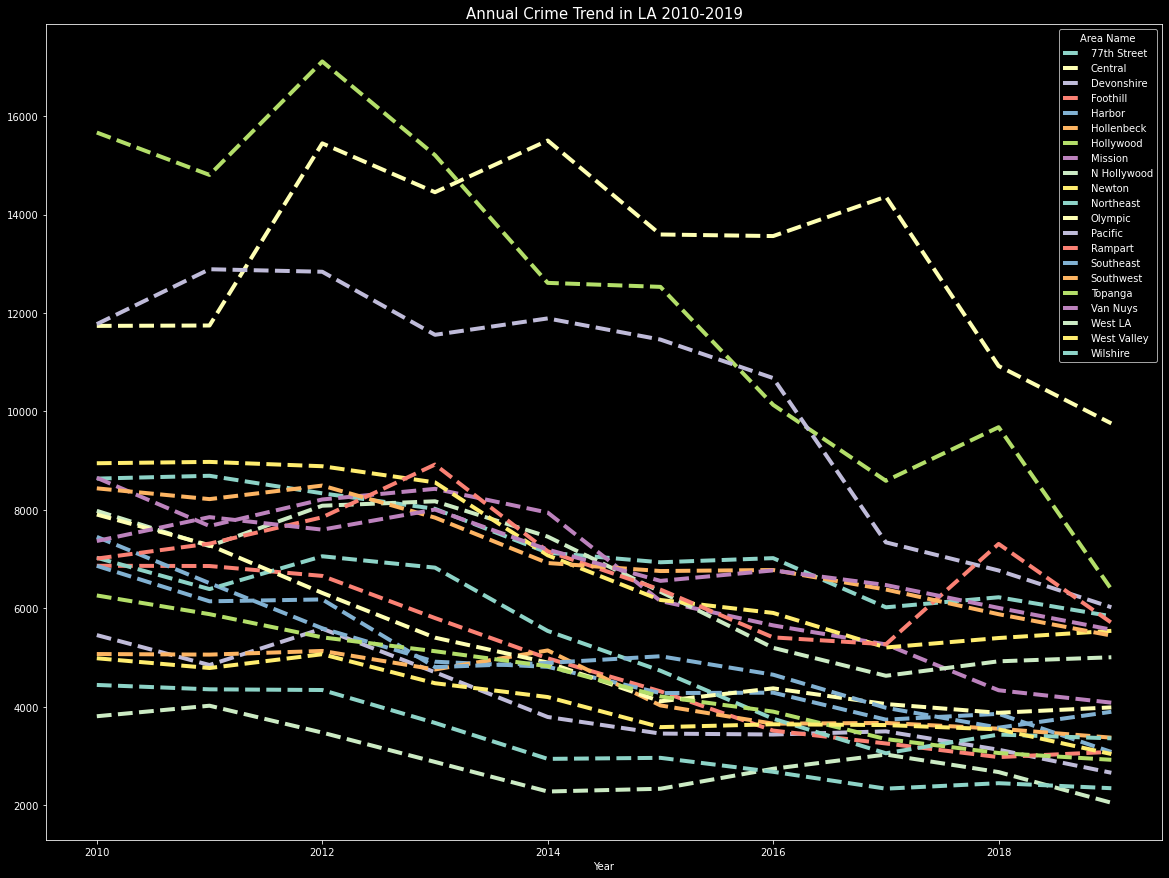

In [81]:
df_concise.groupby(["Year", "Area Name"])["Age"].count().unstack().plot(linestyle="--", linewidth=4, figsize=(20, 15))
plt.title("Annual Crime Trend in LA 2010-2019", size=15)

Text(0.5, 0, '% Decrease')

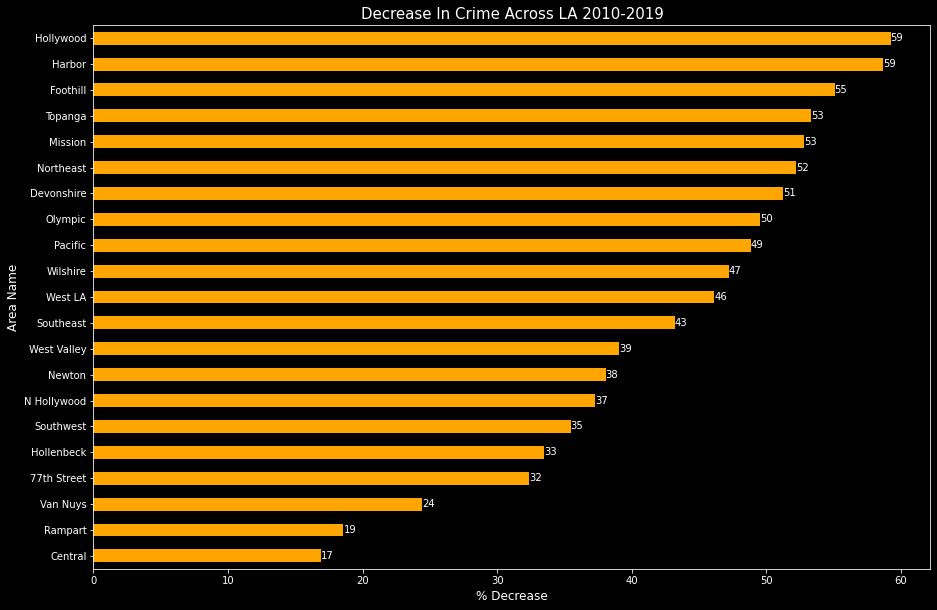

In [82]:
pct_decr = pd.DataFrame({"%decrease": (df_concise.groupby(["Year", "Area Name"])["Age"].count().unstack().T[2010]-df_concise.groupby(["Year", "Area Name"])["Age"].count().unstack().T[2019])/df_concise.groupby(["Year", "Area Name"])["Age"].count().unstack().T[2010]*100})
barp = pct_decr.sort_values("%decrease").plot(kind="barh", color = "orange", figsize=(15, 10), legend=None)
plt.bar_label(barp.containers[0], size=10, fmt="%0.2g")
plt.title("Decrease In Crime Across LA 2010-2019", size=15)
plt.ylabel("Area Name", size=12)
plt.xlabel("% Decrease", size=12)

<AxesSubplot:xlabel='Year'>

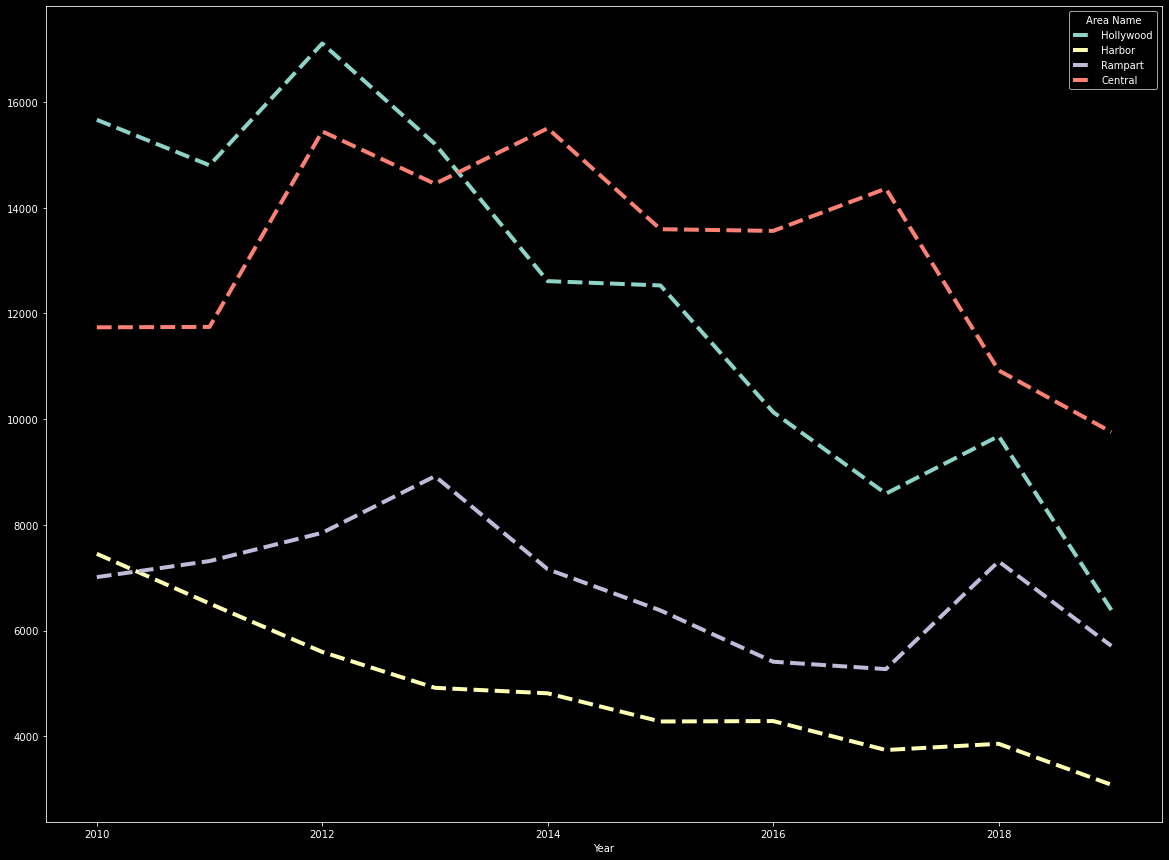

In [83]:
df_concise.groupby(["Year", "Area Name"])["Age"].count().unstack()[["Hollywood", "Harbor", "Rampart", "Central"]].plot(linestyle="--", linewidth=4, figsize=(20, 15))

## Based on the graphs (total crime, crime per 10,000, crime per sqmi, crime in specific years) above, it is clear that West LA, Devonshire, and Wilshire are among the areas with least crime throughout the decade. On the other end, Central, Rampart, Olympic, and Hollywood have the most crime. Of the "worst" areas, Hollywood and Olympic seem to have seen relatively successful reductions in arrests (>=50%) over the decade while Central and Rampart are relatively the worst (<20%) across all of the areas. 

In [84]:
area_group_2015 = df_concise[df_concise["Year"]==2015].groupby(["Charge Group Description", "Area Name"])["Time"].count().unstack().fillna(0)

Text(0.5, 1.0, 'Against Family/Child')

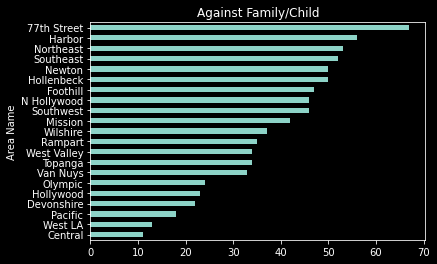

In [85]:
area_group_2015.iloc[0, :].sort_values().plot(kind="barh")
plt.title(area_group_2015.iloc[0, :].name)

In [86]:
list(np.arange(21))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

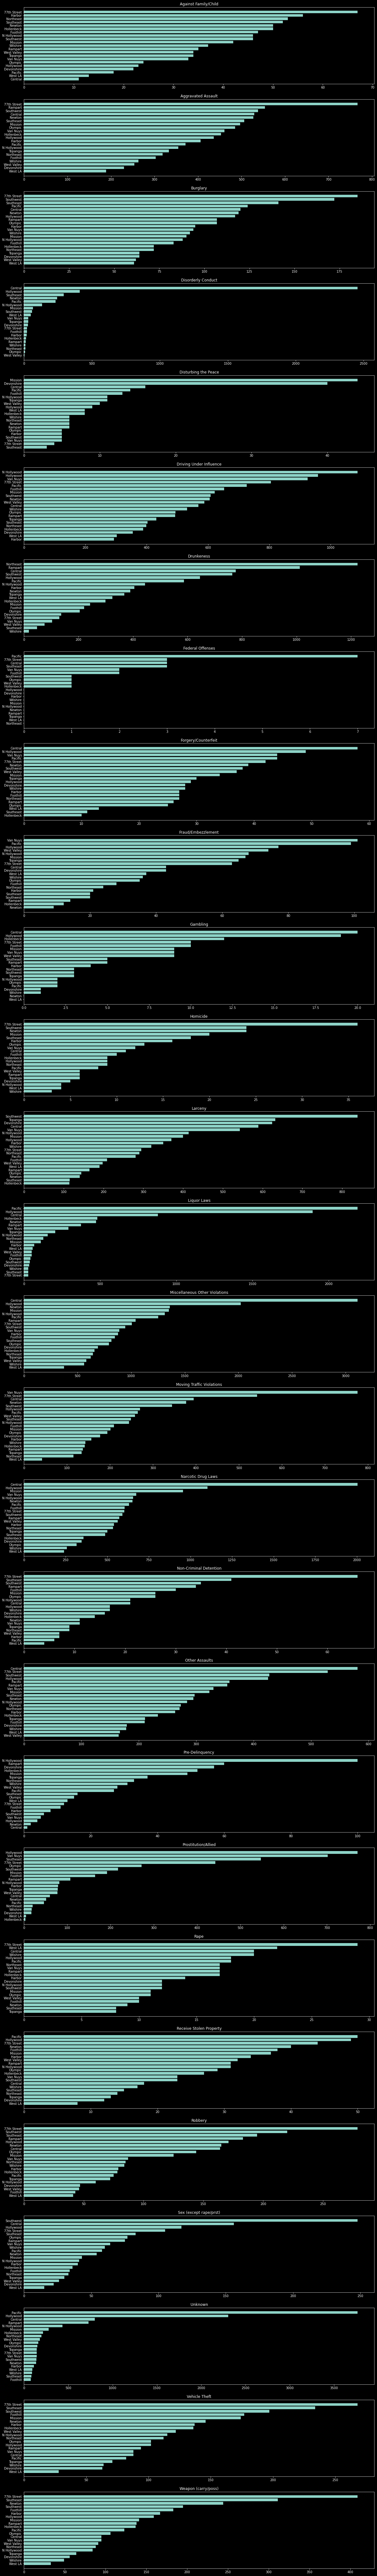

In [87]:
fig, ax = plt.subplots(28, figsize=(20, 150))
for i in range(28):
    ax[i].barh(area_group_2015.iloc[i, :].sort_values().index, area_group_2015.iloc[i, :].sort_values())
    ax[i].set_title(area_group_2015.iloc[i, :].name)

# This segmented analysis of 2015 data paints a different picture than what the aggregated area analysis previously revealed. It seems that Central, which I previously suggested was the worst area in terms of overall criminal activity, might not be the worst in terms of "severity" (hard to properly explain since this evaluation is quite subjective). Central is not the leader in every category of crime. In fact, while it is the clear leader (by a large margin at that) in categories such as"disorderly conduct" and "narcotics/drugs", it isn't a leader (or even top half) in many other categories such as "vehicle theft", "weapon posession", "prostitution". In fact, 77th Street appears to be the clear winner in many of these criminal activity categories that I consider to be "more severe" or at least "more detrimental to the safety of a community", such as "rape", crimes "against family/child", "aggravated assult". In addition to the preceived severity of different criminal activity, the scale of each category should also be taken into account. For example, 77th street appears to be leading in many crimes that are more severe but less frequent (roughly <100 cases per year per area) while Central leads in other crimes that are more frequent (hundreds or thousands of accounts per year per area). These high-occurance categories also include "miscellaneous" and "unknown", of which the severity varies or cannot be properly judged. 

# Conclusion: These points collectively tell us that whether an area in LA is "safer" or "better off" in terms of criminal activity is more nuanced that I previously thought. It is very possible that different areas face different types of issues due to the high disparity within the city (wealth distribution, typical socio-economic background of people living in each area, geographic elements, etc.), and very likely that there is a clear-cut difference when you move from one area to another (since they are all so closely connected anyway). Furthermore, the subjective judgement of whether an area is "safer" may bring up more question than answers. Would you rather live in an area where chances of getting robbed or assulted are slightly higher or an area where the chances of drunk driving and drug abuse are significantly higher? We should consider more closely what the root causes of these issues are.

# Fun sidenote: the wordcloud shows that "illegal posession of shopping cart" is quite a frequent reason for arrest listed within the miscellaneous category. At first I was very confused, but then realized this is likely an indirect indicator of the homelessness issue plaguing LA since many homeless people rely on things like shopping carts to move their belongings. Further research should definately be done to figure out the connection, if one exists, between homelessness and criminal activity happening in LA.

In [88]:
# make 2-way heat maps, other pair-plot to compare every area to every other area.

# group data by date, time, age, location, charge group, charge, etc. (basically most of the significant
# attributes) and then feed into ML regression model to see if we can predict the amount of crime
# that will happen on any given day for any given attribute mentioned above.

# use ML clustering on the dataset to see if any "groups of crime" can be identified or analyzed.

In [89]:
# df_concise.to_csv("LA_Crime_ML_Use.csv")

In [90]:
age_group = []
age = df_concise["Age"]
for i in range(len(age)):
    if age[i]<18:
        age_group.append("Minor")
    elif age[i]>=18 and age[i]<21:
        age_group.append("18-20")
    elif age[i]>=21 and age[i]<24:
        age_group.append("21-23")
    elif age[i]>=24 and age[i]<27:
        age_group.append("24-26")
    elif age[i]>=27 and age[i]<30:
        age_group.append("27-29")
    elif age[i]>=30 and age[i]<33:
        age_group.append("30-32")
    elif age[i]>=33 and age[i]<36:
        age_group.append("33-35")
    elif age[i]>=36 and age[i]<39:
        age_group.append("36-38")
    elif age[i]>=39 and age[i]<42:
        age_group.append("39-41")
    elif age[i]>=42 and age[i]<45:
        age_group.append("42-44")
    elif age[i]>=45 and age[i]<48:
        age_group.append("45-47")
    elif age[i]>=48 and age[i]<51:
        age_group.append("48-50")
    elif age[i]>=51 and age[i]<54:
        age_group.append("51-53")
    elif age[i]>=54 and age[i]<57:
        age_group.append("54-56")
    elif age[i]>=57 and age[i]<60:
        age_group.append("57-59")
    elif age[i]>=60 and age[i]<63:
        age_group.append("60-62")
    elif age[i]>=63 and age[i]<65:
        age_group.append("63-64")
    elif age[i]>=65:
        age_group.append("Senior")
df_concise["Age Group"] = age_group

<AxesSubplot:>

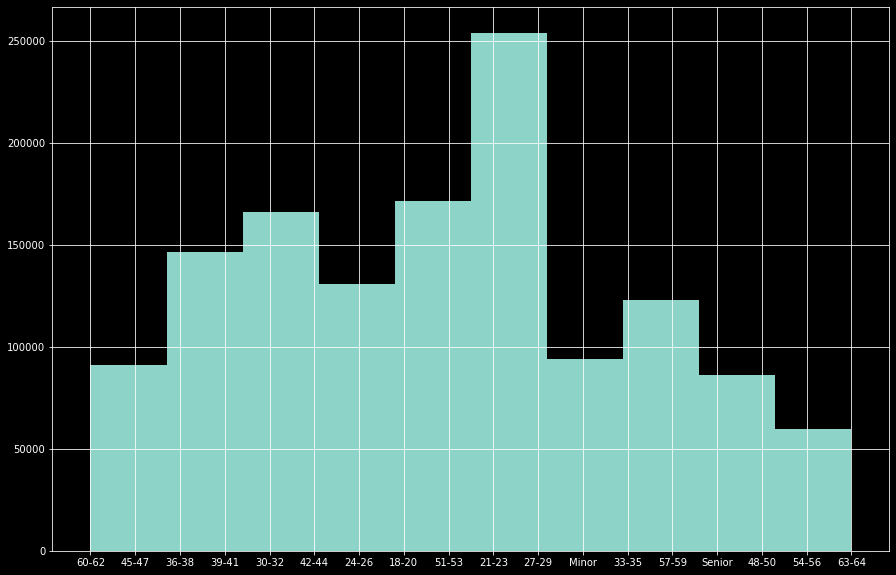

In [91]:
df_concise["Age Group"].hist(figsize=(15, 10))

In [92]:
group = df_concise.groupby(by=["Area Name", "Charge Group Description"])["Report ID"].count()
group

Area Name    Charge Group Description
77th Street  Against Family/Child         672
             Aggravated Assault          7896
             Burglary                    2077
             Disorderly Conduct           228
             Disturbing the Peace          60
                                         ... 
Wilshire     Robbery                      902
             Sex (except rape/prst)       463
             Unknown                     1210
             Vehicle Theft                548
             Weapon (carry/poss)          636
Name: Report ID, Length: 588, dtype: int64

In [93]:
# pandas 2.0 removed iteritems, which messes with seaborn graphs below
# https://stackoverflow.com/questions/76404811/attributeerror-dataframe-object-has-no-attribute-iteritems
pd.DataFrame.iteritems = pd.DataFrame.items

C:\Users\chiuy\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


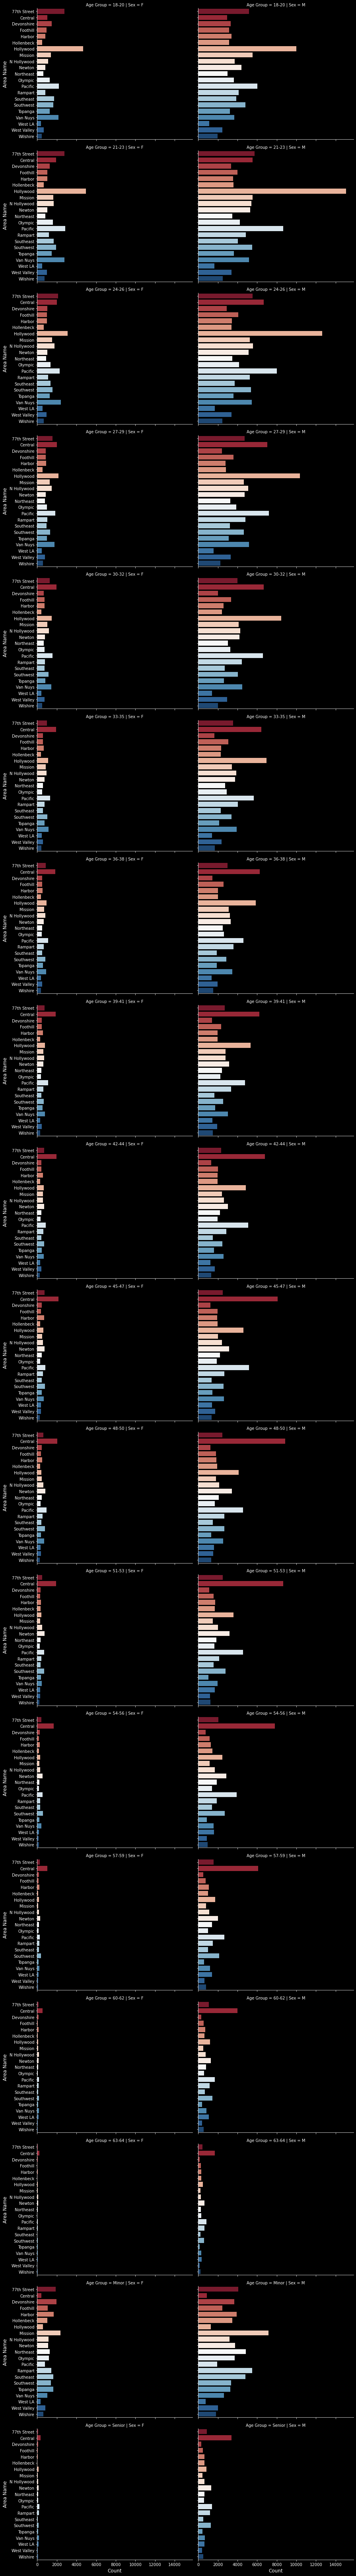

In [94]:
a = pd.DataFrame(df_concise.groupby(["Age Group", "Sex", "Area Name"])["Report ID"].count().reset_index())
a.rename(columns={"Report ID": "Count"}, inplace=True)
cols = sns.color_palette("RdBu", 21)
g = sns.FacetGrid(a, col="Sex", row="Age Group", height=5, aspect=1.25)
g.map(sns.barplot, "Count", "Area Name", palette=cols)
g.set_xlabels(fontsize="large")
g.set_ylabels(fontsize="large")

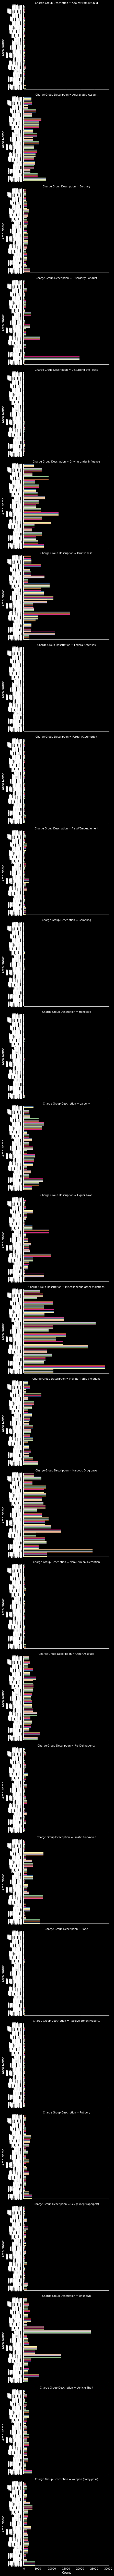

In [95]:
a = pd.DataFrame(df_concise.groupby(["Charge Group Description", "Area Name"])["Report ID"]
                 .count().reset_index())
a.rename(columns={"Report ID": "Count"}, inplace=True)
# a.sort_values(["Charge Group Description", "Count"], ascending=False, inplace=True)
cols = sns.color_palette("Accent")
g = sns.FacetGrid(a, row="Charge Group Description", height=5, aspect=1.25)
g.map(sns.barplot, "Count", "Area Name", order=a.sort_values(["Area Name", "Count"], ascending=False)["Area Name"], palette=cols)
g.set_xlabels(fontsize="large")
g.set_ylabels(fontsize="large")

<AxesSubplot:xlabel='Aggravated Assault', ylabel='Area Name'>

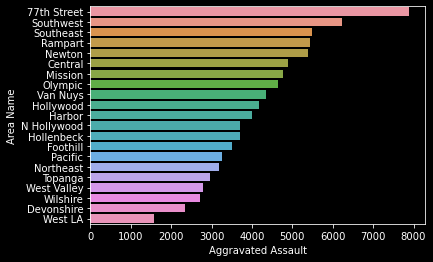

In [96]:
a = pd.DataFrame(df_concise.groupby(["Charge Group Description", "Area Name"])["Report ID"]
                 .count())
b = pd.DataFrame(a.unstack().T.iloc[:, 1].reset_index().iloc[:, 1:3]).sort_values(by="Aggravated Assault", ascending=False)
sns.barplot(data=b, x='Aggravated Assault', y="Area Name")

<AxesSubplot:xlabel='Report ID', ylabel='Area Name'>

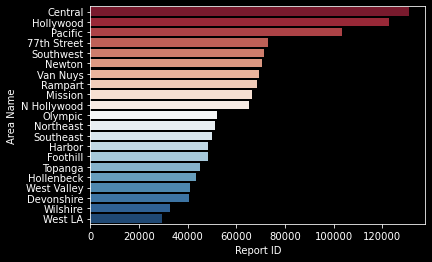

In [98]:
b = df_concise.groupby("Area Name")["Report ID"].count().reset_index()
sns.barplot(data=b, y="Area Name", x="Report ID", order=b.sort_values
            ("Report ID", ascending=False)["Area Name"], palette=sns.color_palette("RdBu", 21))

Text(0, 0.5, 'Freq')

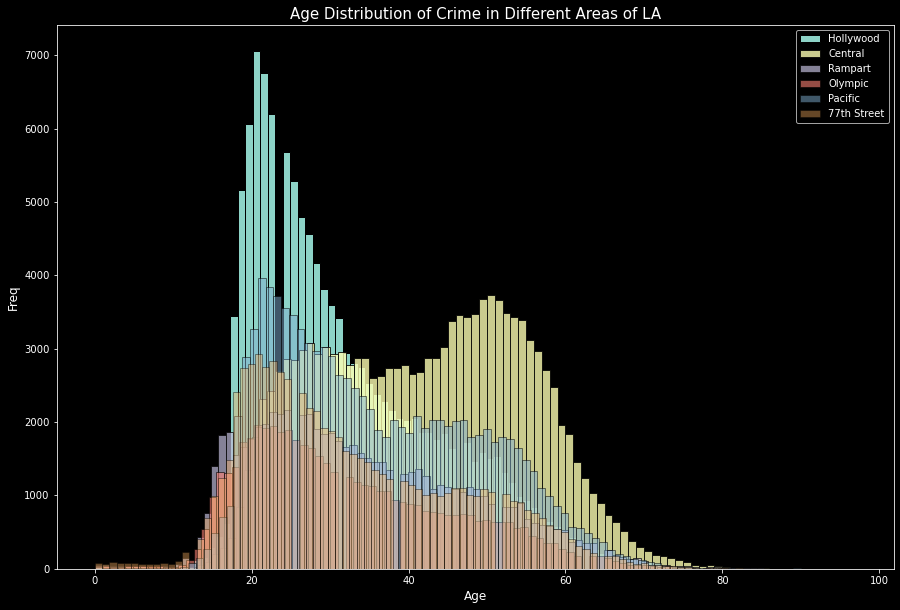

In [116]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.hist(df_concise[df_concise["Area Name"]=="Hollywood"]["Age"], bins=97, edgecolor="black",
       label="Hollywood")
ax.hist(df_concise[df_concise["Area Name"]=="Central"]["Age"], bins=97, edgecolor="black", alpha=0.8,
       label="Central")
ax.hist(df_concise[df_concise["Area Name"]=="Rampart"]["Age"], bins=97, edgecolor="black", alpha=0.7,
       label="Rampart")
ax.hist(df_concise[df_concise["Area Name"]=="Olympic"]["Age"], bins=97, edgecolor="black", alpha=0.6,
       label="Olympic")
ax.hist(df_concise[df_concise["Area Name"]=="Pacific"]["Age"], bins=97, edgecolor="black", alpha=0.5,
       label="Pacific")
ax.hist(df_concise[df_concise["Area Name"]=="77th Street"]["Age"], bins=97, edgecolor="black", alpha=0.4,
       label="77th Street")
ax.legend()
ax.set_title("Age Distribution of Crime in Different Areas of LA", size=15)
ax.set_xlabel("Age", size=12)
ax.set_ylabel("Freq", size=12)

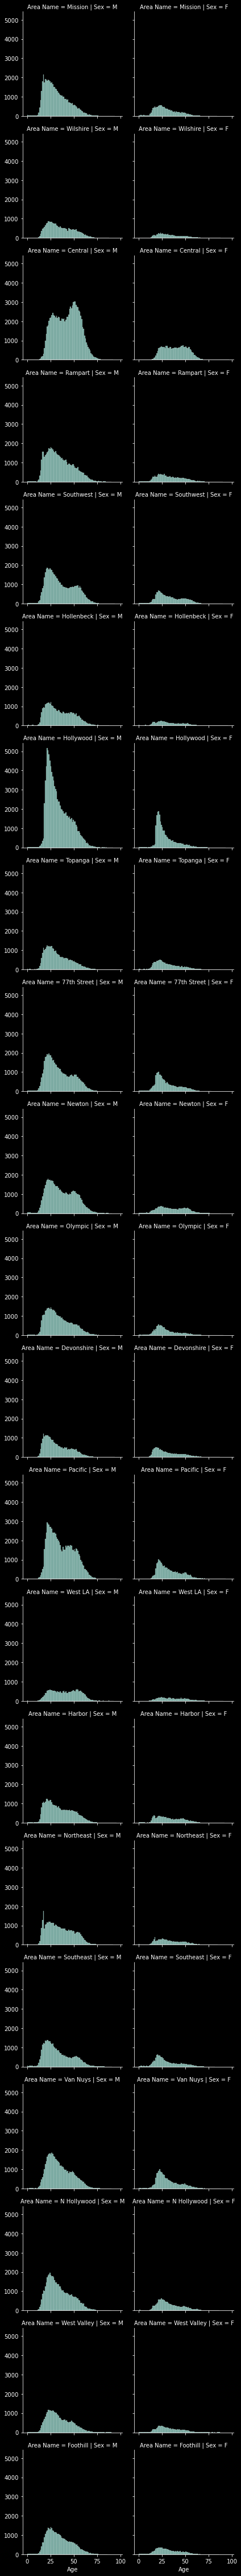

In [100]:
f = sns.FacetGrid(df_concise, row="Area Name", col="Sex", height=3, aspect=1)
f.map(sns.histplot, "Age", binwidth=1)

## In the faceted histograms above there is a unique finding. Most of the categories have at least one peak roughly at the 21-25 range and often a second peak at the 50-55 range (second peak isn't always clear). For these graphs, the 21-25 peak is almost always the taller (often by a large marge), indicating that most arrests in LA have been for young adults. The male and female graphs generally follow the same trend for each area, but even if the female graph skews slightly differently, they are often much smaller in sample size compared to the male group counterpart, so the general trends (combining male and female) should not be different from just the male trends.

## However, there are two areas where there are exceptions: Central and West LA. For West LA the two peaks are pretty much the same height. West LA has the least total arrests and we have determined that West LA is the safest area (lowest crime by land mass and 3rd lowest by population). The fact that there aren't (proportionally) more young people commiting crimes in this area may contribute towards explaining why it is the "safest" area in LA. 

## On the other hand, Central LA has the most crime and can be considered the least safe by the same measures (including least improvement from 2010-2019). In Central LA, the peak around age 50 is higher than the peak around age 25, indicating that proportionally more older people are commiting criminal activity in this area. Further analysis can be completed by pairing these histograms with data that break down the types of charges for different areas (e.g. does an older arrest population correlate with a different set of common arrest charges).

<AxesSubplot:>

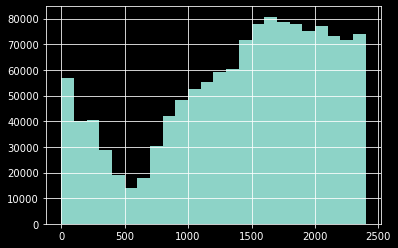

In [101]:
df_concise["Time"].hist(bins=24)

In [102]:
day_night = []
time = df_concise["Time"]
for i in range(len(time)):
    if time[i]< 500 or time[i]>1700:
        day_night.append("Night")
    else:
        day_night.append("Daytime")
    
df_concise["Day/Night"] = day_night

<AxesSubplot:ylabel='Day/Night'>

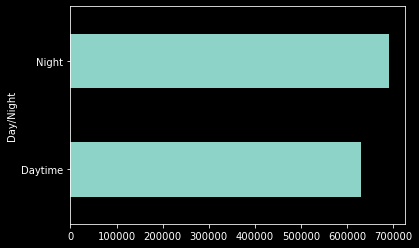

In [103]:
df_concise.groupby("Day/Night")["Report ID"].count().plot(kind="barh")

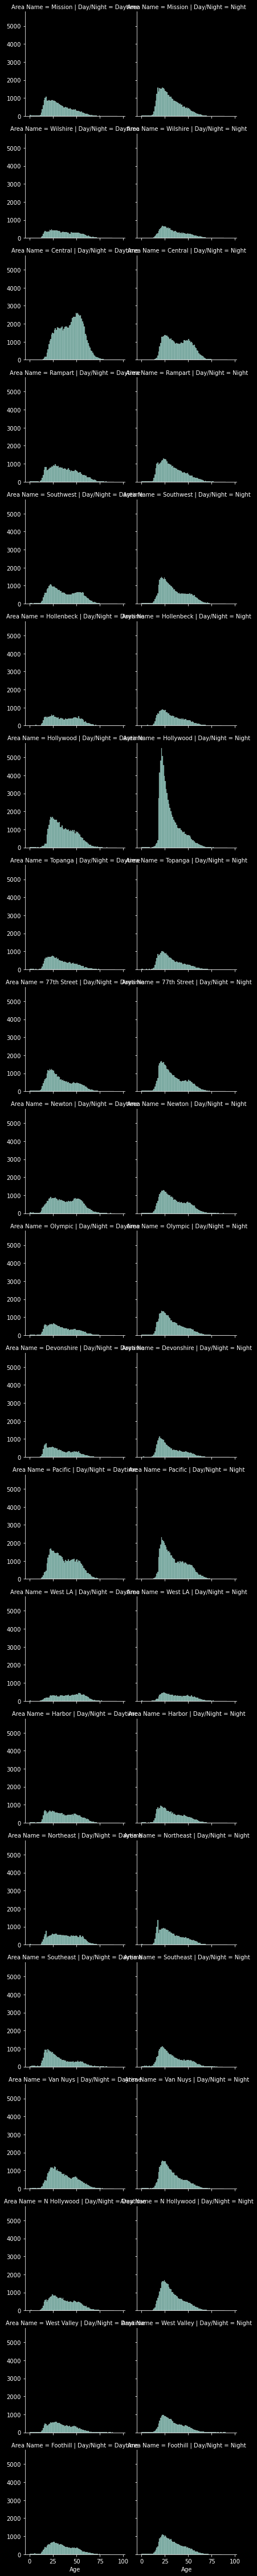

In [104]:
f = sns.FacetGrid(df_concise, row="Area Name", col="Day/Night", height=3, aspect=1)
f.map(sns.histplot, "Age", binwidth=1)

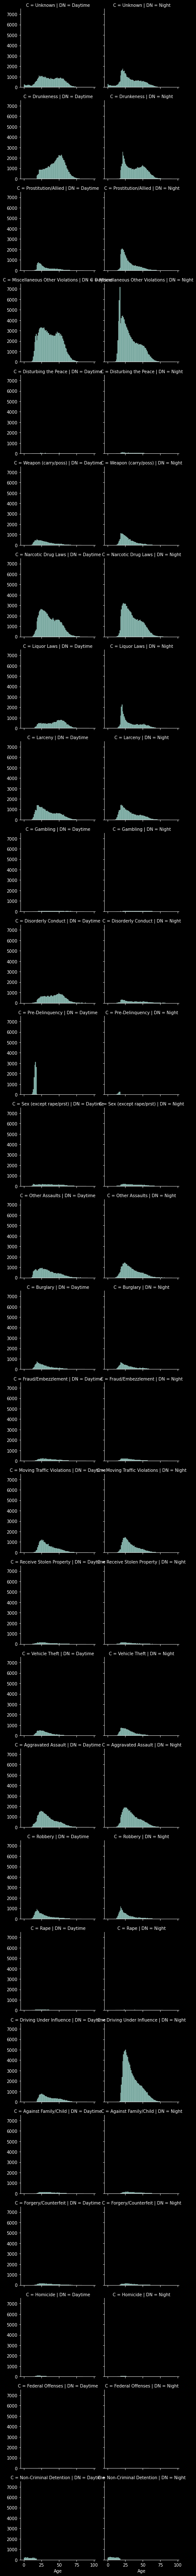

In [105]:
f = sns.FacetGrid(df_concise.rename(columns={"Charge Group Description": "C", "Day/Night": "DN"}), row="C", col="DN", height=3, aspect=1)
f.map(sns.histplot, "Age", binwidth=1)

In [106]:
# I think instead of these large facet grids, using a multielement barplot might be a better way to 
#represent these data since I just want to compare the overall volume of arrests between Day and 
#Night or Male and Female. I.e. age distribution here gives extra, but unnecessary context for this 
#purpose.

Text(0, 0.5, 'Area Name')

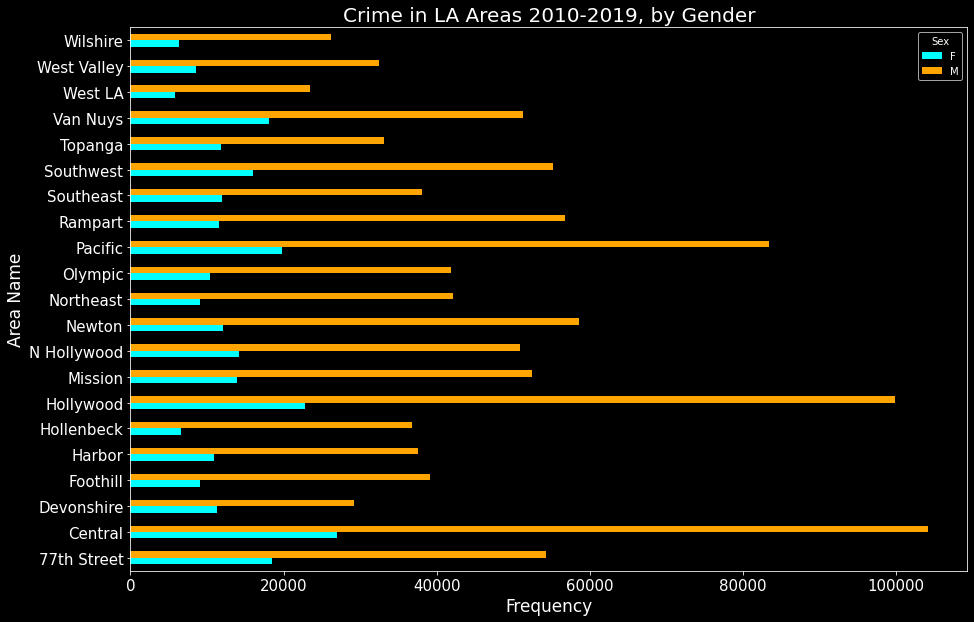

In [107]:
df_concise.groupby(["Area Name", "Sex"])["Report ID"].count().unstack().plot(kind="barh",
    color=["cyan", "orange"], figsize=(15, 10), fontsize=15)
plt.title("Crime in LA Areas 2010-2019, by Gender", size=20)
plt.xlabel("Frequency", size=17)
plt.ylabel("Area Name", size=17)

Text(0, 0.5, 'Area Name')

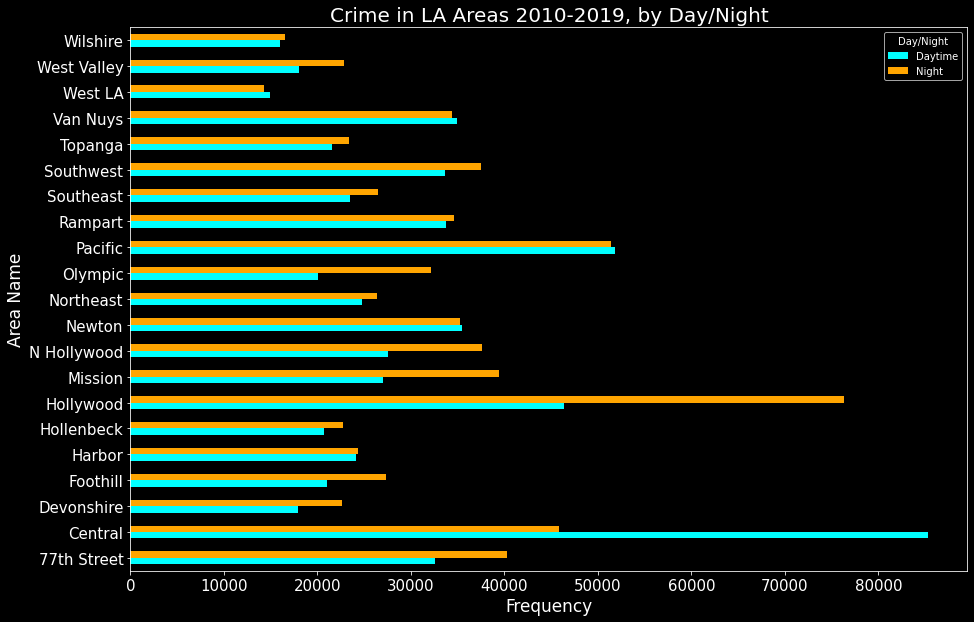

In [108]:
df_concise.groupby(["Area Name", "Day/Night"])["Report ID"].count().unstack().plot(kind="barh",
    color=["cyan", "orange"], figsize=(15, 10), fontsize=15)
plt.title("Crime in LA Areas 2010-2019, by Day/Night", size=20)
plt.xlabel("Frequency", size=17)
plt.ylabel("Area Name", size=17)

Text(0.5, 1.0, 'Narcotic Drug Laws')

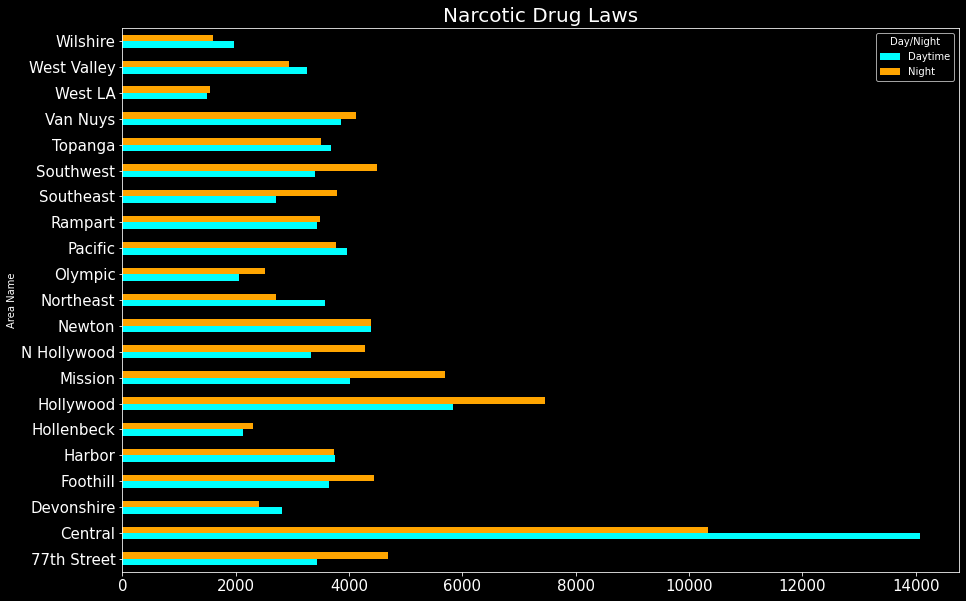

In [109]:
des = "Narcotic Drug Laws"
df_concise[df_concise["Charge Group Description"]==des].groupby(["Area Name", "Day/Night"])["Report ID"].count().unstack().plot(kind="barh",
    color=["cyan", "orange"], figsize=(15, 10), fontsize=15)
plt.title(des, size=20)

In [110]:
df_concise[df_concise["Charge Group Description"]=="Non-Criminal Detention"]["Charge Description"].unique()

array(['PROT CUST/ENDANGER SIBLINGS/UNFIT HOME',
       'FAIL PROTECT CHILD FROM SEXUAL ABUSE',
       'PARENT IN CUSTODY, NO CARETAKER AVAILABLE',
       'SERIOUS EMOTIONAL DAMAGE', 'CHILD UNDER 5 SEVERE PHYSICAL ABUSE',
       'PARENT CAUSE/CONVICT OF CHILD ABUSE DEATH', 'CRUELTY',
       'REMOVE MINOR FROM CUSTODY OF PARENT',
       'RELINQUISH/TERMINATE PARENTAL RIGHTS',
       'PROT CUST/ENDANGER SIBLINGS/UNFIT HOME****'], dtype=object)

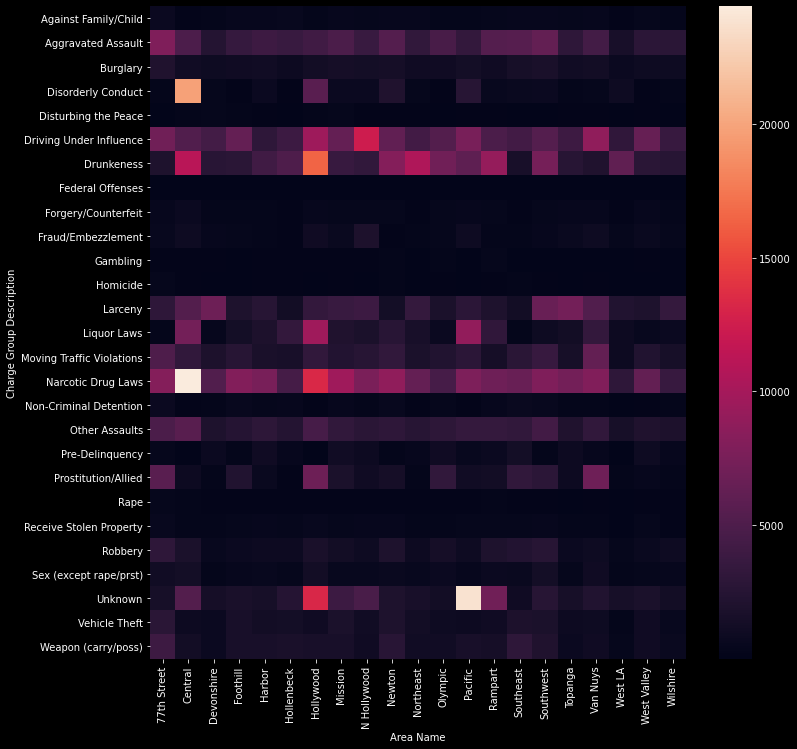

In [128]:
areagroup = df_concise[df_concise["Charge Group Description"]!="Miscellaneous Other Violations"].groupby(["Area Name", "Charge Group Description"])["Report ID"].count().unstack().T
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(areagroup)
plt.show()

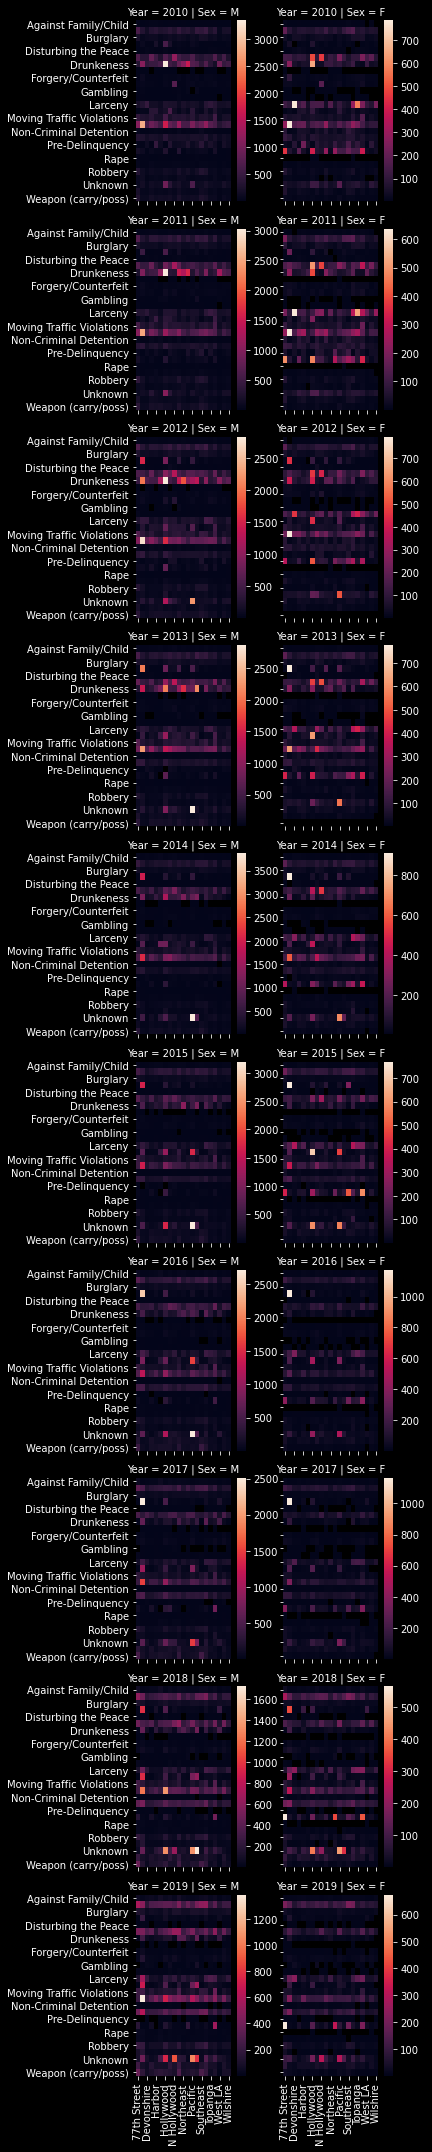

In [142]:
def gen_heatmap(data, color):
    areagroup = data[data["Charge Group Description"]!="Miscellaneous Other Violations"].groupby(["Area Name", "Charge Group Description"])["Report ID"].count().unstack().T
    sns.heatmap(areagroup)

f = sns.FacetGrid(df_concise, row="Year", col="Sex")
f.map_dataframe(gen_heatmap)

## Facetgrid heatmaps seemed like a good idea at first because it can easily visualize the relationship between many features (the example above looks at the occurance of crime split by category, geography, sex of suspect, and year). However, the result is quite hard to justify as being useful (despite looking quite pretty) because there is too much information crammed together. It might be easy to quickly spot local peaks (just look for the yellow and white spots on each sub heatmap), but very hard to compare trends such as YoY change for specific groups.

## Next I will try to wholistically answer the question "which areas of LA are safer/more dangerous". I will utilize two types of graphs: quadrant graphs that can display the position of each region relative to each other using two metrics (e.g. crime/capita plotted against ratio of violent crime), and bar graphs that compare singular metrics (e.g. average YoY change in crime).

In [205]:
import plotly.express as px

In [177]:
day_night = df_concise.groupby(by=["Area Name", "Day/Night"])["Report ID"].count().unstack()
day_night["Ratio"] = day_night["Daytime"]/(day_night["Daytime"]+day_night["Night"])
day_night.drop(["Daytime", "Night"], axis=1, inplace=True)

In [192]:
by_pop = pd.DataFrame(df_concise.groupby(by=["Area Name"])["Report ID"].count())
by_pop["per_capita"] = by_pop["Report ID"]/area_pop["Population"]
by_pop.drop("Report ID", axis=1, inplace=True)

<AxesSubplot:xlabel='Area Name'>

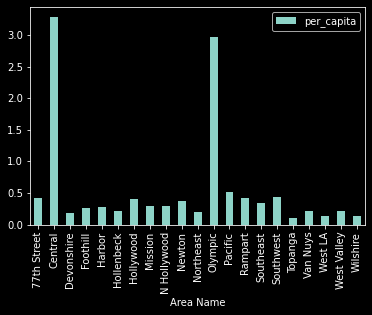

In [194]:
by_pop.plot(kind="bar")

<AxesSubplot:xlabel='Area Name'>

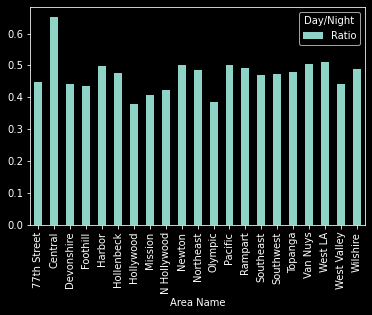

In [181]:
day_night.plot(kind="bar")

## Determine what type of crime occurs more at night vs daytime.

(0.0, 1.0)

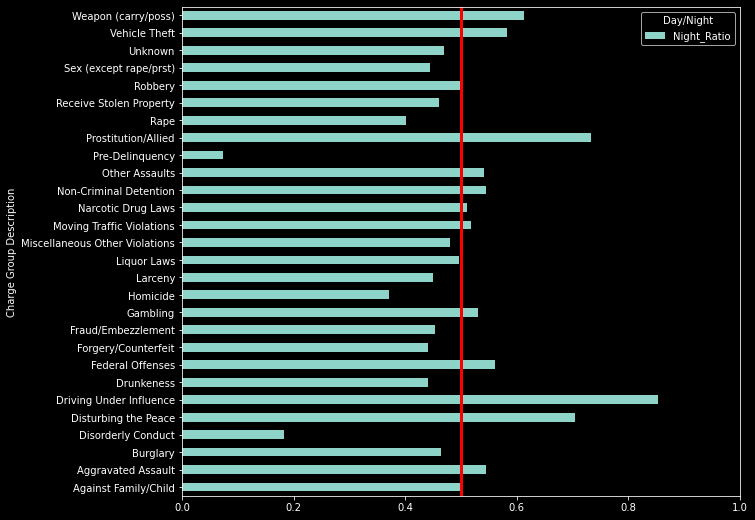

In [245]:
dn_group = df_concise.groupby(by=["Charge Group Description", "Day/Night"])["Report ID"].count().unstack()
dn_group["Night_Ratio"] = dn_group["Night"]/(dn_group["Daytime"]+dn_group["Night"])
dn_group.drop(["Daytime", "Night"], axis=1, inplace=True)

fig = dn_group.plot(kind="barh", figsize=(10, 9))
fig.axvline(x=0.5, color="r", linewidth=3)
fig.set_xlim([0, 1])